In [ ]:
# Installing and loading required packages
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Loading the victim-level shooting dataset
victim_level_data <- read.csv("NYPD_Shooting_Incident.csv")

In [ ]:
head(victim_level_data)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,⋯,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,228798151,05/27/2021,21:30:00,QUEENS,,105,0,,,FALSE,⋯,,,18-24,M,BLACK,1058925,180924.0,40.66296,-73.73084,POINT (-73.73083868899994 40.662964620000025)
2,137471050,06/27/2014,17:40:00,BRONX,,40,0,,,FALSE,⋯,,,18-24,M,BLACK,1005028,234516.0,40.81035,-73.92494,POINT (-73.92494232599995 40.81035186300006)
3,147998800,11/21/2015,03:56:00,QUEENS,,108,0,,,TRUE,⋯,,,25-44,M,WHITE,1007668,209836.5,40.74261,-73.91549,POINT (-73.91549174199997 40.74260663300004)
4,146837977,10/09/2015,18:30:00,BRONX,,44,0,,,FALSE,⋯,,,<18,M,WHITE HISPANIC,1006537,244511.1,40.83778,-73.91946,POINT (-73.91945661499994 40.83778200300003)
5,58921844,02/19/2009,22:58:00,BRONX,,47,0,,,TRUE,⋯,M,BLACK,45-64,M,BLACK,1024922,262189.4,40.88624,-73.85291,POINT (-73.85290950899997 40.88623791800006)
6,219559682,10/21/2020,21:36:00,BROOKLYN,,81,0,,,TRUE,⋯,,,25-44,M,BLACK,1004234,186461.7,40.67846,-73.92795,POINT (-73.92795224099996 40.678456718000064)


In [ ]:
library(dplyr)

unique_incident_keys <- victim_level_data %>%
  distinct(INCIDENT_KEY) %>%
  n_distinct()

cat("Number of unique incident keys:", unique_incident_keys, "\n")

Number of unique incident keys: 21420 


In [ ]:
library(dplyr)

# Grouping by INCIDENT_KEY and summarizing to count victims in each incident
shooting_summary <- victim_level_data %>%
  group_by(INCIDENT_KEY) %>%
  summarize(VICTIM_COUNT = n())

# Merging the summary back into the original dataset
victim_level_data <- victim_level_data %>%
  left_join(shooting_summary, by = "INCIDENT_KEY")

# Removing duplicate rows based on INCIDENT_KEY
victim_level_data <- victim_level_data %>%
  distinct(INCIDENT_KEY, .keep_all = TRUE)

In [ ]:
head(victim_level_data)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,⋯,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,VICTIM_COUNT
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,228798151,05/27/2021,21:30:00,QUEENS,,105,0,,,FALSE,⋯,,18-24,M,BLACK,1058925,180924.0,40.66296,-73.73084,POINT (-73.73083868899994 40.662964620000025),2
2,137471050,06/27/2014,17:40:00,BRONX,,40,0,,,FALSE,⋯,,18-24,M,BLACK,1005028,234516.0,40.81035,-73.92494,POINT (-73.92494232599995 40.81035186300006),1
3,147998800,11/21/2015,03:56:00,QUEENS,,108,0,,,TRUE,⋯,,25-44,M,WHITE,1007668,209836.5,40.74261,-73.91549,POINT (-73.91549174199997 40.74260663300004),1
4,146837977,10/09/2015,18:30:00,BRONX,,44,0,,,FALSE,⋯,,<18,M,WHITE HISPANIC,1006537,244511.1,40.83778,-73.91946,POINT (-73.91945661499994 40.83778200300003),1
5,58921844,02/19/2009,22:58:00,BRONX,,47,0,,,TRUE,⋯,BLACK,45-64,M,BLACK,1024922,262189.4,40.88624,-73.85291,POINT (-73.85290950899997 40.88623791800006),1
6,219559682,10/21/2020,21:36:00,BROOKLYN,,81,0,,,TRUE,⋯,,25-44,M,BLACK,1004234,186461.7,40.67846,-73.92795,POINT (-73.92795224099996 40.678456718000064),1


In [ ]:
any(duplicated(victim_level_data$INCIDENT_KEY))

[1] FALSE

In [ ]:
unique_incident_keys <- victim_level_data %>%
  distinct(INCIDENT_KEY) %>%
  n_distinct()

cat("Number of unique incident keys:", unique_incident_keys, "\n")

Number of unique incident keys: 21420 


In [ ]:
# Renaming the dataset
shooting_incident_level_data <- victim_level_data


In [ ]:
head(shooting_incident_level_data)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,⋯,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,VICTIM_COUNT
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,228798151,05/27/2021,21:30:00,QUEENS,,105,0,,,FALSE,⋯,,18-24,M,BLACK,1058925,180924.0,40.66296,-73.73084,POINT (-73.73083868899994 40.662964620000025),2
2,137471050,06/27/2014,17:40:00,BRONX,,40,0,,,FALSE,⋯,,18-24,M,BLACK,1005028,234516.0,40.81035,-73.92494,POINT (-73.92494232599995 40.81035186300006),1
3,147998800,11/21/2015,03:56:00,QUEENS,,108,0,,,TRUE,⋯,,25-44,M,WHITE,1007668,209836.5,40.74261,-73.91549,POINT (-73.91549174199997 40.74260663300004),1
4,146837977,10/09/2015,18:30:00,BRONX,,44,0,,,FALSE,⋯,,<18,M,WHITE HISPANIC,1006537,244511.1,40.83778,-73.91946,POINT (-73.91945661499994 40.83778200300003),1
5,58921844,02/19/2009,22:58:00,BRONX,,47,0,,,TRUE,⋯,BLACK,45-64,M,BLACK,1024922,262189.4,40.88624,-73.85291,POINT (-73.85290950899997 40.88623791800006),1
6,219559682,10/21/2020,21:36:00,BROOKLYN,,81,0,,,TRUE,⋯,,25-44,M,BLACK,1004234,186461.7,40.67846,-73.92795,POINT (-73.92795224099996 40.678456718000064),1


In [ ]:
summary(shooting_incident_level_data)

  INCIDENT_KEY        OCCUR_DATE         OCCUR_TIME            BORO          
 Min.   :  9953245   Length:21420       Length:21420       Length:21420      
 1st Qu.: 64394528   Class :character   Class :character   Class :character  
 Median : 91165008   Mode  :character   Mode  :character   Mode  :character  
 Mean   :121166392                                                           
 3rd Qu.:188062788                                                           
 Max.   :261190187                                                           
                                                                             
 LOC_OF_OCCUR_DESC     PRECINCT      JURISDICTION_CODE LOC_CLASSFCTN_DESC
 Length:21420       Min.   :  1.00   Min.   :0.0000    Length:21420      
 Class :character   1st Qu.: 44.00   1st Qu.:0.0000    Class :character  
 Mode  :character   Median : 69.00   Median :0.0000    Mode  :character  
                    Mean   : 66.12   Mean   :0.3373                      
      

In [ ]:
str(shooting_incident_level_data)

'data.frame':	21420 obs. of  22 variables:
 $ INCIDENT_KEY           : int  228798151 137471050 147998800 146837977 58921844 219559682 85295722 71662474 83002139 86437261 ...
 $ OCCUR_DATE             : chr  "05/27/2021" "06/27/2014" "11/21/2015" "10/09/2015" ...
 $ OCCUR_TIME             : chr  "21:30:00" "17:40:00" "03:56:00" "18:30:00" ...
 $ BORO                   : chr  "QUEENS" "BRONX" "QUEENS" "BRONX" ...
 $ LOC_OF_OCCUR_DESC      : chr  "" "" "" "" ...
 $ PRECINCT               : int  105 40 108 44 47 81 114 81 105 101 ...
 $ JURISDICTION_CODE      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ LOC_CLASSFCTN_DESC     : chr  "" "" "" "" ...
 $ LOCATION_DESC          : chr  "" "" "" "" ...
 $ STATISTICAL_MURDER_FLAG: logi  FALSE FALSE TRUE FALSE TRUE TRUE ...
 $ PERP_AGE_GROUP         : chr  "" "" "" "" ...
 $ PERP_SEX               : chr  "" "" "" "" ...
 $ PERP_RACE              : chr  "" "" "" "" ...
 $ VIC_AGE_GROUP          : chr  "18-24" "18-24" "25-44" "<18" ...
 $ VIC_SEX             

In [ ]:
any(duplicated(shooting_incident_level_data$OCCUR_DATE))

[1] TRUE

In [ ]:
any(duplicated(shooting_incident_level_data$INCIDENT_KEY))

[1] FALSE

In [ ]:
# Converting OCCUR_DATE column to proper date format
shooting_incident_level_data$OCCUR_DATE <- as.Date(shooting_incident_level_data$OCCUR_DATE, format = "%m/%d/%Y")

In [ ]:
library(dplyr)

shooting_incident_level_data <- shooting_incident_level_data %>%
  mutate(OCCUR_YEAR = year(as.Date(OCCUR_DATE)))


In [ ]:
# Replacing blank spaces with NA in the dataframe
shooting_incident_level_data[shooting_incident_level_data == ""] <- NA

In [ ]:
# Counting missing values in each column
missing_count <- colSums(is.na(shooting_incident_level_data))
print(missing_count)

           INCIDENT_KEY              OCCUR_DATE              OCCUR_TIME 
                      0                       0                       0 
                   BORO       LOC_OF_OCCUR_DESC                PRECINCT 
                      0                   20126                       0 
      JURISDICTION_CODE      LOC_CLASSFCTN_DESC           LOCATION_DESC 
                      2                   20126                   11964 
STATISTICAL_MURDER_FLAG          PERP_AGE_GROUP                PERP_SEX 
                      0                    8120                    8090 
              PERP_RACE           VIC_AGE_GROUP                 VIC_SEX 
                   8090                       0                       0 
               VIC_RACE              X_COORD_CD              Y_COORD_CD 
                      0                       0                       0 
               Latitude               Longitude                 Lon_Lat 
                      9                       9    

In [ ]:
library(dplyr)
#converting blank fields and null values in different columns to NA values
shooting_incident_level_data <- shooting_incident_level_data %>%
  mutate(PERP_RACE = replace(PERP_RACE, PERP_RACE == "(null)", NA))

In [ ]:
shooting_incident_level_data <- shooting_incident_level_data %>%
  mutate(PERP_SEX = replace(PERP_SEX, PERP_SEX == "(null)", NA))

In [ ]:
shooting_incident_level_data <- shooting_incident_level_data %>%
  mutate(PERP_AGE_GROUP = replace(PERP_AGE_GROUP, PERP_AGE_GROUP == "(null)", NA))

In [ ]:
shooting_incident_level_data <- shooting_incident_level_data %>%
  mutate(LOCATION_DESC = replace(LOCATION_DESC, LOCATION_DESC== "(null)", NA))

In [ ]:
# Counting missing values in each column
missing_count <- colSums(is.na(shooting_incident_level_data))
print(missing_count)

           INCIDENT_KEY              OCCUR_DATE              OCCUR_TIME 
                      0                       0                       0 
                   BORO       LOC_OF_OCCUR_DESC                PRECINCT 
                      0                   20126                       0 
      JURISDICTION_CODE      LOC_CLASSFCTN_DESC           LOCATION_DESC 
                      2                   20126                   12713 
STATISTICAL_MURDER_FLAG          PERP_AGE_GROUP                PERP_SEX 
                      0                    8645                    8615 
              PERP_RACE           VIC_AGE_GROUP                 VIC_SEX 
                   8615                       0                       0 
               VIC_RACE              X_COORD_CD              Y_COORD_CD 
                      0                       0                       0 
               Latitude               Longitude                 Lon_Lat 
                      9                       9    

In [ ]:
install.packages("visdat")
install.packages("ggplot2")
library(visdat)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



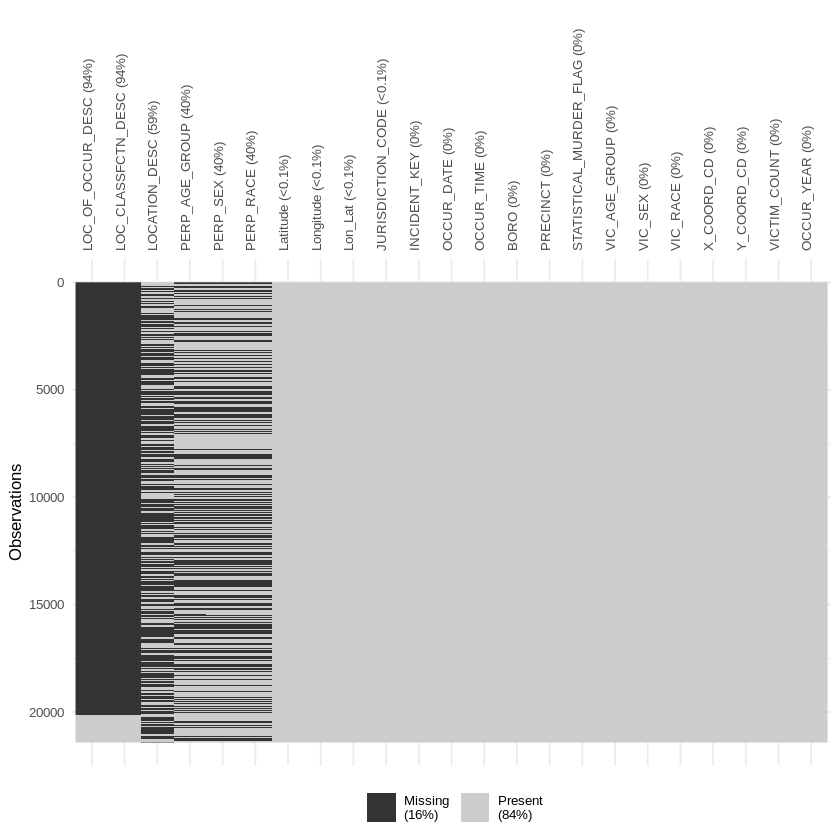

In [ ]:
# Creating visualization of missing data
vis_miss(shooting_incident_level_data, warn_large_data = FALSE, sort_miss = TRUE) +
  theme(text = element_text(size = 10), axis.text.x = element_text(angle = 90, hjust = 0))

In [ ]:
head(shooting_incident_level_data)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,⋯,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,VICTIM_COUNT,OCCUR_YEAR
,<int>,<date>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>
1,228798151,2021-05-27,21:30:00,QUEENS,NA,105,0,NA,NA,FALSE,⋯,18-24,M,BLACK,1058925,180924.0,40.66296,-73.73084,POINT (-73.73083868899994 40.662964620000025),2,2021
2,137471050,2014-06-27,17:40:00,BRONX,NA,40,0,NA,NA,FALSE,⋯,18-24,M,BLACK,1005028,234516.0,40.81035,-73.92494,POINT (-73.92494232599995 40.81035186300006),1,2014
3,147998800,2015-11-21,03:56:00,QUEENS,NA,108,0,NA,NA,TRUE,⋯,25-44,M,WHITE,1007668,209836.5,40.74261,-73.91549,POINT (-73.91549174199997 40.74260663300004),1,2015
4,146837977,2015-10-09,18:30:00,BRONX,NA,44,0,NA,NA,FALSE,⋯,<18,M,WHITE HISPANIC,1006537,244511.1,40.83778,-73.91946,POINT (-73.91945661499994 40.83778200300003),1,2015
5,58921844,2009-02-19,22:58:00,BRONX,NA,47,0,NA,NA,TRUE,⋯,45-64,M,BLACK,1024922,262189.4,40.88624,-73.85291,POINT (-73.85290950899997 40.88623791800006),1,2009
6,219559682,2020-10-21,21:36:00,BROOKLYN,NA,81,0,NA,NA,TRUE,⋯,25-44,M,BLACK,1004234,186461.7,40.67846,-73.92795,POINT (-73.92795224099996 40.678456718000064),1,2020


In [ ]:
library(dplyr)

# filtering columns and removing rows without meaningful categories or NA values
shooting_incident_level_data <- shooting_incident_level_data %>%
  filter(is.na(VIC_AGE_GROUP) | grepl("^(<18|18-24|25-44|45-64|65+|UNKNOWN)$", VIC_AGE_GROUP))


In [ ]:
library(dplyr)

# filtering columns and removing rows without meaningful categories or NA values
shooting_incident_level_data <- shooting_incident_level_data %>%
  filter(is.na(PERP_AGE_GROUP) | grepl("^(<18|18-24|25-44|45-64|65+|UNKNOWN)$", PERP_AGE_GROUP))


In [ ]:

shooting_incident_level_data$OCCUR_TIME <- as.POSIXct(
  shooting_incident_level_data$OCCUR_TIME,
  format = "%H:%M:%S"
)

# Combining OCCUR_DATE and OCCUR_TIME to create OCCUR_DATETIME
shooting_incident_level_data$OCCUR_DATETIME <- as.POSIXct(
  paste(shooting_incident_level_data$OCCUR_DATE, format(shooting_incident_level_data$OCCUR_TIME, "%H:%M:%S")),
  format = "%Y-%m-%d %H:%M:%S"
)


In [ ]:
head(shooting_incident_level_data)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,⋯,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,VICTIM_COUNT,OCCUR_YEAR,OCCUR_DATETIME
,<int>,<date>,<dttm>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dttm>
1,228798151,2021-05-27,2023-09-13 21:30:00,QUEENS,NA,105,0,NA,NA,FALSE,⋯,M,BLACK,1058925,180924.0,40.66296,-73.73084,POINT (-73.73083868899994 40.662964620000025),2,2021,2021-05-27 21:30:00
2,137471050,2014-06-27,2023-09-13 17:40:00,BRONX,NA,40,0,NA,NA,FALSE,⋯,M,BLACK,1005028,234516.0,40.81035,-73.92494,POINT (-73.92494232599995 40.81035186300006),1,2014,2014-06-27 17:40:00
3,147998800,2015-11-21,2023-09-13 03:56:00,QUEENS,NA,108,0,NA,NA,TRUE,⋯,M,WHITE,1007668,209836.5,40.74261,-73.91549,POINT (-73.91549174199997 40.74260663300004),1,2015,2015-11-21 03:56:00
4,146837977,2015-10-09,2023-09-13 18:30:00,BRONX,NA,44,0,NA,NA,FALSE,⋯,M,WHITE HISPANIC,1006537,244511.1,40.83778,-73.91946,POINT (-73.91945661499994 40.83778200300003),1,2015,2015-10-09 18:30:00
5,58921844,2009-02-19,2023-09-13 22:58:00,BRONX,NA,47,0,NA,NA,TRUE,⋯,M,BLACK,1024922,262189.4,40.88624,-73.85291,POINT (-73.85290950899997 40.88623791800006),1,2009,2009-02-19 22:58:00
6,219559682,2020-10-21,2023-09-13 21:36:00,BROOKLYN,NA,81,0,NA,NA,TRUE,⋯,M,BLACK,1004234,186461.7,40.67846,-73.92795,POINT (-73.92795224099996 40.678456718000064),1,2020,2020-10-21 21:36:00


In [ ]:
# excluding the OCCUR_TIME column from the data
shooting_incident_level_data <- subset(shooting_incident_level_data, select = -c(OCCUR_TIME))


In [ ]:
head(shooting_incident_level_data)

,INCIDENT_KEY,OCCUR_DATE,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,⋯,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,VICTIM_COUNT,OCCUR_YEAR,OCCUR_DATETIME
,<int>,<date>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dttm>
1,228798151,2021-05-27,QUEENS,NA,105,0,NA,NA,FALSE,NA,⋯,M,BLACK,1058925,180924.0,40.66296,-73.73084,POINT (-73.73083868899994 40.662964620000025),2,2021,2021-05-27 21:30:00
2,137471050,2014-06-27,BRONX,NA,40,0,NA,NA,FALSE,NA,⋯,M,BLACK,1005028,234516.0,40.81035,-73.92494,POINT (-73.92494232599995 40.81035186300006),1,2014,2014-06-27 17:40:00
3,147998800,2015-11-21,QUEENS,NA,108,0,NA,NA,TRUE,NA,⋯,M,WHITE,1007668,209836.5,40.74261,-73.91549,POINT (-73.91549174199997 40.74260663300004),1,2015,2015-11-21 03:56:00
4,146837977,2015-10-09,BRONX,NA,44,0,NA,NA,FALSE,NA,⋯,M,WHITE HISPANIC,1006537,244511.1,40.83778,-73.91946,POINT (-73.91945661499994 40.83778200300003),1,2015,2015-10-09 18:30:00
5,58921844,2009-02-19,BRONX,NA,47,0,NA,NA,TRUE,25-44,⋯,M,BLACK,1024922,262189.4,40.88624,-73.85291,POINT (-73.85290950899997 40.88623791800006),1,2009,2009-02-19 22:58:00
6,219559682,2020-10-21,BROOKLYN,NA,81,0,NA,NA,TRUE,NA,⋯,M,BLACK,1004234,186461.7,40.67846,-73.92795,POINT (-73.92795224099996 40.678456718000064),1,2020,2020-10-21 21:36:00


In [ ]:
#converting the columns to suitable programming data types
shooting_incident_level_data$VIC_SEX <- factor(shooting_incident_level_data$VIC_SEX)
shooting_incident_level_data$BORO <- factor(shooting_incident_level_data$BORO)
shooting_incident_level_data$VIC_RACE <- factor(shooting_incident_level_data$VIC_RACE)
shooting_incident_level_data$PRECINCT <- factor(shooting_incident_level_data$PRECINCT)
shooting_incident_level_data$PERP_RACE <- factor(shooting_incident_level_data$PERP_RACE)
shooting_incident_level_data$PERP_SEX <- factor(shooting_incident_level_data$PERP_SEX)
shooting_incident_level_data$PERP_AGE_GROUP <- factor(shooting_incident_level_data$PERP_AGE_GROUP )
shooting_incident_level_data$JURISDICTION_CODE <- factor(shooting_incident_level_data$JURISDICTION_CODE)
shooting_incident_level_data$INCIDENT_KEY <- as.character(shooting_incident_level_data$INCIDENT_KEY)
shooting_incident_level_data$VIC_AGE_GROUP <- factor(shooting_incident_level_data$VIC_AGE_GROUP)

In [ ]:
shooting_incident_level_data$LOCATION_DESC <- factor(shooting_incident_level_data$LOCATION_DESC)
shooting_incident_level_data$LOC_OF_OCCUR_DESC <- factor(shooting_incident_level_data$LOC_OF_OCCUR_DESC)
shooting_incident_level_data$LOC_CLASSFCTN_DESC <- factor(shooting_incident_level_data$LOC_CLASSFCTN_DESC)

In [ ]:
head(shooting_incident_level_data)

,INCIDENT_KEY,OCCUR_DATE,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,⋯,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,VICTIM_COUNT,OCCUR_YEAR,OCCUR_DATETIME
,<chr>,<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dttm>
1,228798151,2021-05-27,QUEENS,NA,105,0,NA,NA,FALSE,NA,⋯,M,BLACK,1058925,180924.0,40.66296,-73.73084,POINT (-73.73083868899994 40.662964620000025),2,2021,2021-05-27 21:30:00
2,137471050,2014-06-27,BRONX,NA,40,0,NA,NA,FALSE,NA,⋯,M,BLACK,1005028,234516.0,40.81035,-73.92494,POINT (-73.92494232599995 40.81035186300006),1,2014,2014-06-27 17:40:00
3,147998800,2015-11-21,QUEENS,NA,108,0,NA,NA,TRUE,NA,⋯,M,WHITE,1007668,209836.5,40.74261,-73.91549,POINT (-73.91549174199997 40.74260663300004),1,2015,2015-11-21 03:56:00
4,146837977,2015-10-09,BRONX,NA,44,0,NA,NA,FALSE,NA,⋯,M,WHITE HISPANIC,1006537,244511.1,40.83778,-73.91946,POINT (-73.91945661499994 40.83778200300003),1,2015,2015-10-09 18:30:00
5,58921844,2009-02-19,BRONX,NA,47,0,NA,NA,TRUE,25-44,⋯,M,BLACK,1024922,262189.4,40.88624,-73.85291,POINT (-73.85290950899997 40.88623791800006),1,2009,2009-02-19 22:58:00
6,219559682,2020-10-21,BROOKLYN,NA,81,0,NA,NA,TRUE,NA,⋯,M,BLACK,1004234,186461.7,40.67846,-73.92795,POINT (-73.92795224099996 40.678456718000064),1,2020,2020-10-21 21:36:00


In [ ]:
summary(shooting_incident_level_data)

 INCIDENT_KEY         OCCUR_DATE                    BORO      LOC_OF_OCCUR_DESC
 Length:21247       Min.   :2006-01-01   BRONX        :5978   INSIDE :  177    
 Class :character   1st Qu.:2009-08-02   BROOKLYN     :8737   OUTSIDE: 1102    
 Mode  :character   Median :2013-06-14   MANHATTAN    :2723   NA's   :19968    
                    Mean   :2014-01-17   QUEENS       :3198                    
                    3rd Qu.:2018-09-23   STATEN ISLAND: 611                    
                    Max.   :2022-12-31                                         
                                                                               
    PRECINCT     JURISDICTION_CODE  LOC_CLASSFCTN_DESC
 75     : 1220   0   :17619        STREET    :  822   
 73     : 1167   1   :   55        HOUSING   :  221   
 67     :  992   2   : 3571        DWELLING  :  100   
 79     :  798   NA's:    2        COMMERCIAL:   64   
 44     :  743                     OTHER     :   23   
 47     :  743                

INITIAL EXPLORATORY DATA ANALYSIS (EDA)


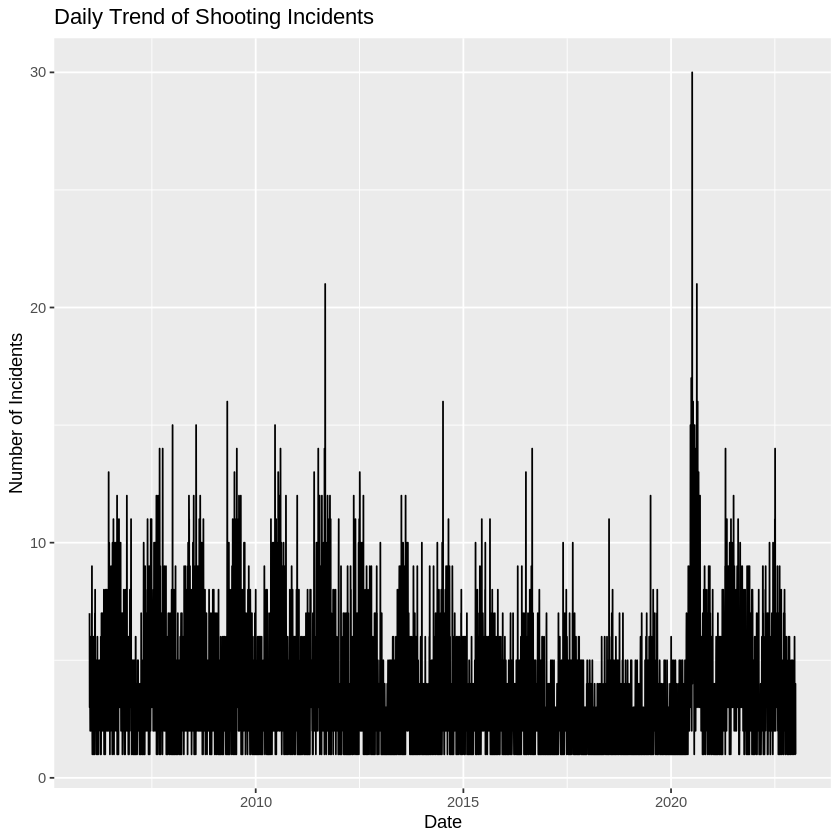

In [ ]:
library(ggplot2)

# Daily trend
daily_counts <- aggregate(INCIDENT_KEY ~ OCCUR_DATE, data = shooting_incident_level_data, FUN = length)
ggplot(data = daily_counts, aes(x = OCCUR_DATE, y = INCIDENT_KEY)) +
  geom_line() +
  labs(title = "Daily Trend of Shooting Incidents",
       x = "Date",
       y = "Number of Incidents")


In [ ]:
install.packages("zoo")
library(zoo)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


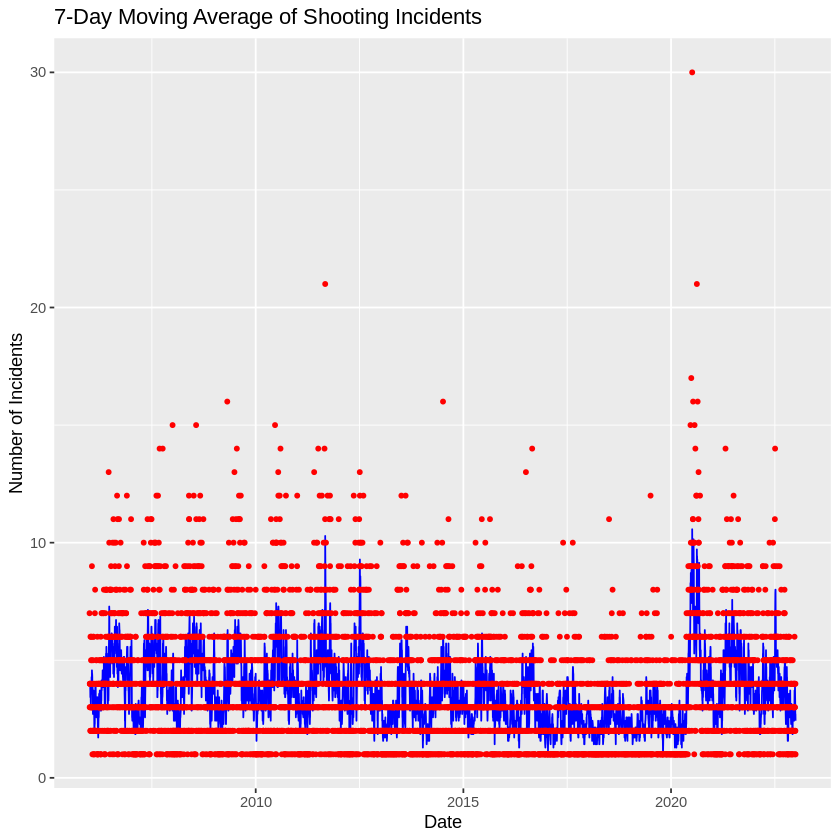

In [ ]:
# Calculating a 7-day moving average to identify trends
library(dplyr)

daily_counts <- daily_counts %>%
  mutate(MA_7days = zoo::rollmean(INCIDENT_KEY, k = 7, fill = NA, align = "right"))

ggplot(data = daily_counts, aes(x = OCCUR_DATE)) +
  geom_line(aes(y = MA_7days), color = "blue") +
  geom_point(aes(y = INCIDENT_KEY), color = "red", size = 1) +
  labs(title = "7-Day Moving Average of Shooting Incidents",
       x = "Date",
       y = "Number of Incidents")


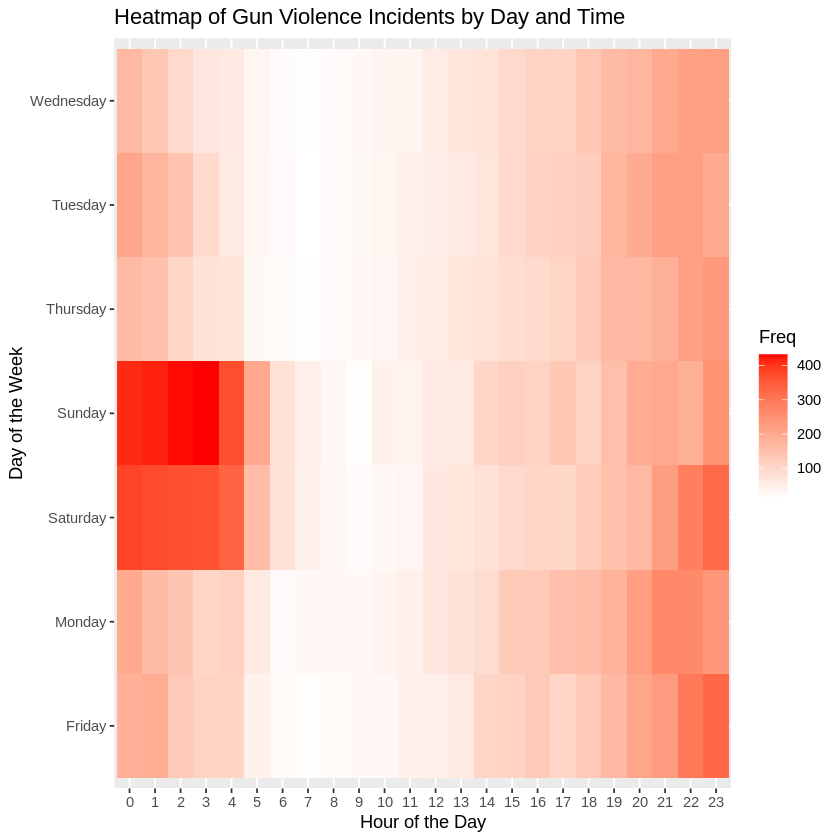

In [ ]:
# Extracting day of the week and hour of the day from OCCUR_DATE and OCCUR_DATETIME
shooting_incident_level_data$DayOfWeek <- weekdays(shooting_incident_level_data$OCCUR_DATE)
shooting_incident_level_data$HourOfDay <- as.numeric(format(shooting_incident_level_data$OCCUR_DATETIME, "%H"))

# Creating a table of incidents by day of the week and hour of the day
incident_table <- table(shooting_incident_level_data$DayOfWeek, shooting_incident_level_data$HourOfDay)

# Creating a heatmap
library(ggplot2)

ggplot(data = as.data.frame(incident_table), aes(x = Var2, y = Var1, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "Heatmap of Gun Violence Incidents by Day and Time",
       x = "Hour of the Day",
       y = "Day of the Week")


In [ ]:
library(dplyr)

# Aggregating the data by year
incidents_by_year <- shooting_incident_level_data %>%
  group_by(Year = OCCUR_YEAR) %>%
  summarize(Incident_Count = n())

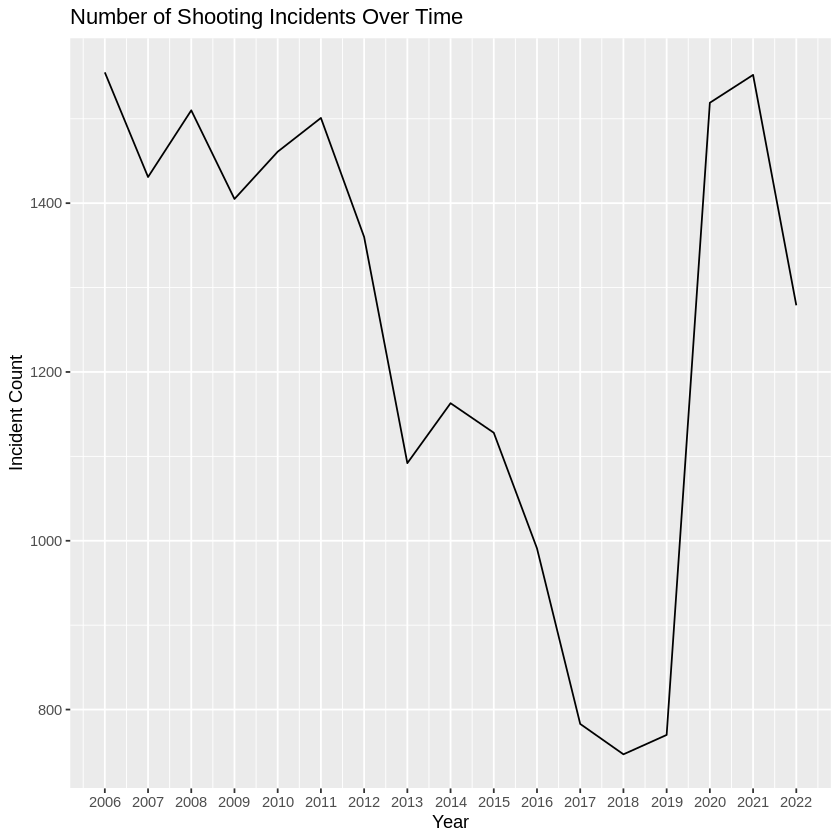

In [ ]:
# Creating a time series plot
ggplot(incidents_by_year, aes(x = Year, y = Incident_Count)) +
  geom_line() +
  labs(title = "Number of Shooting Incidents Over Time",
       x = "Year",
       y = "Incident Count") +
  scale_x_continuous(breaks = unique(incidents_by_year$Year))

In [ ]:
# Summarizing the data by month and storing it in a new variable
summarized_data <- shooting_incident_level_data %>%
  mutate(Month = format(OCCUR_DATE, "%m")) %>%
  group_by(Month) %>%
  summarize(Incident_Count = n())

In [ ]:
print(summarized_data)

# A tibble: 12 × 2
   Month Incident_Count
   <chr>          <int>
 1 01              1361
 2 02              1044
 3 03              1314
 4 04              1572
 5 05              1959
 6 06              2192
 7 07              2476
 8 08              2439
 9 09              2002
10 10              1770
11 11              1523
12 12              1595


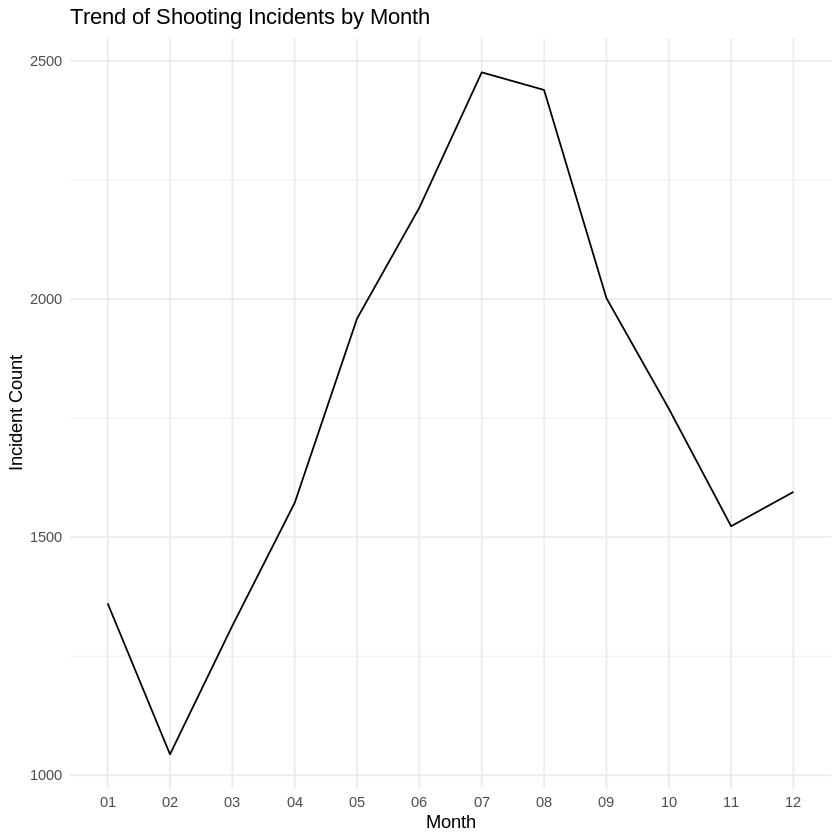

In [ ]:
# Creating a line plot
ggplot(summarized_data, aes(x = Month, y = Incident_Count, group = 1)) +
  geom_line() +
  labs(title = "Trend of Shooting Incidents by Month",
       x = "Month",
       y = "Incident Count") +
  theme_minimal()


In [ ]:
#Descriptive statistics for age groups
summary(shooting_incident_level_data$PERP_AGE_GROUP)
summary(shooting_incident_level_data$VIC_AGE_GROUP)

<18   18-24   25-44   45-64 UNKNOWN    NA's 
   1088    4346    4066     417    2725    8605

<18   18-24   25-44   45-64 UNKNOWN 
   2106    7915    9797    1391      38

In [ ]:
unique_values <- unique(shooting_incident_level_data$PERP_AGE_GROUP)
print(unique_values)


[1] <NA>    25-44   UNKNOWN 18-24   45-64   <18    
Levels: <18 18-24 25-44 45-64 UNKNOWN


In [ ]:
unique_values <- unique(shooting_incident_level_data$PERP_AGE_GROUP)
print(unique_values)


[1] <NA>    25-44   UNKNOWN 18-24   45-64   <18    
Levels: <18 18-24 25-44 45-64 UNKNOWN


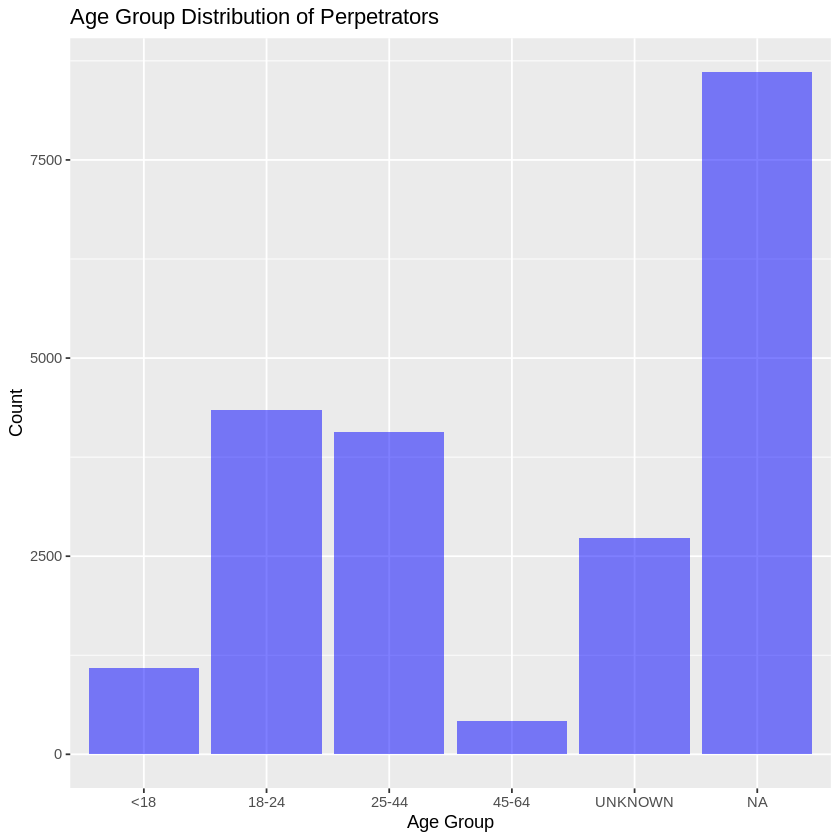

In [ ]:
# Visualizing age group distributions for perpetrators using a count plot
ggplot(shooting_incident_level_data, aes(x = PERP_AGE_GROUP)) +
  geom_bar(fill = "blue", alpha = 0.5) +
  labs(title = "Age Group Distribution of Perpetrators", x = "Age Group", y = "Count")

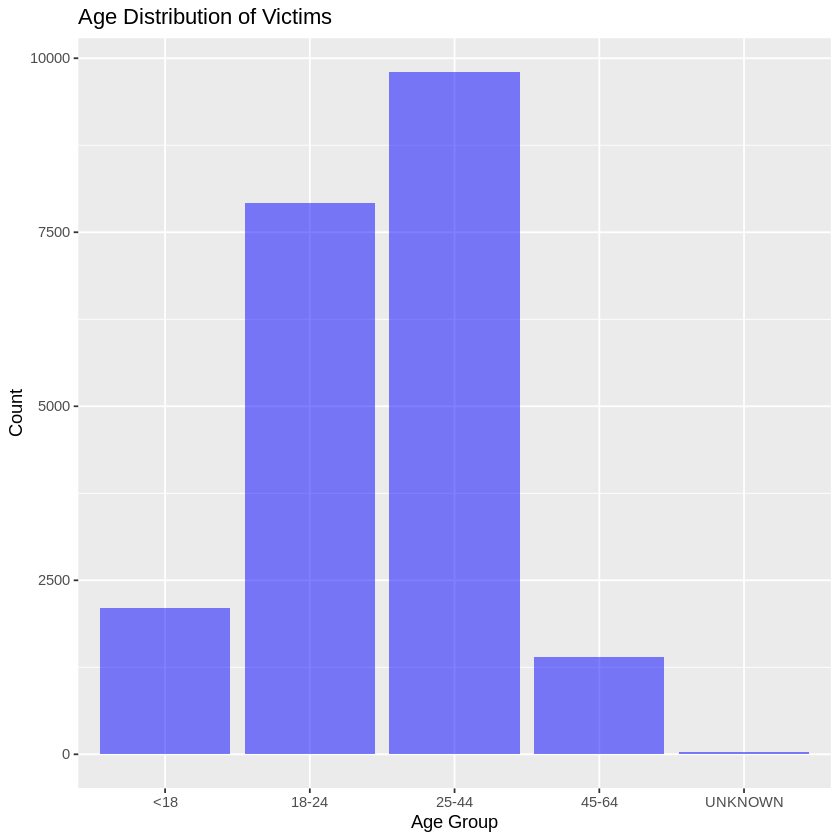

In [ ]:
# Visualizing age group distributions for victims using a count plot
ggplot(shooting_incident_level_data, aes(x = VIC_AGE_GROUP)) +
  geom_bar(fill = "blue", alpha = 0.5) +
  labs(title = "Age Distribution of Victims", x = "Age Group", y = "Count")

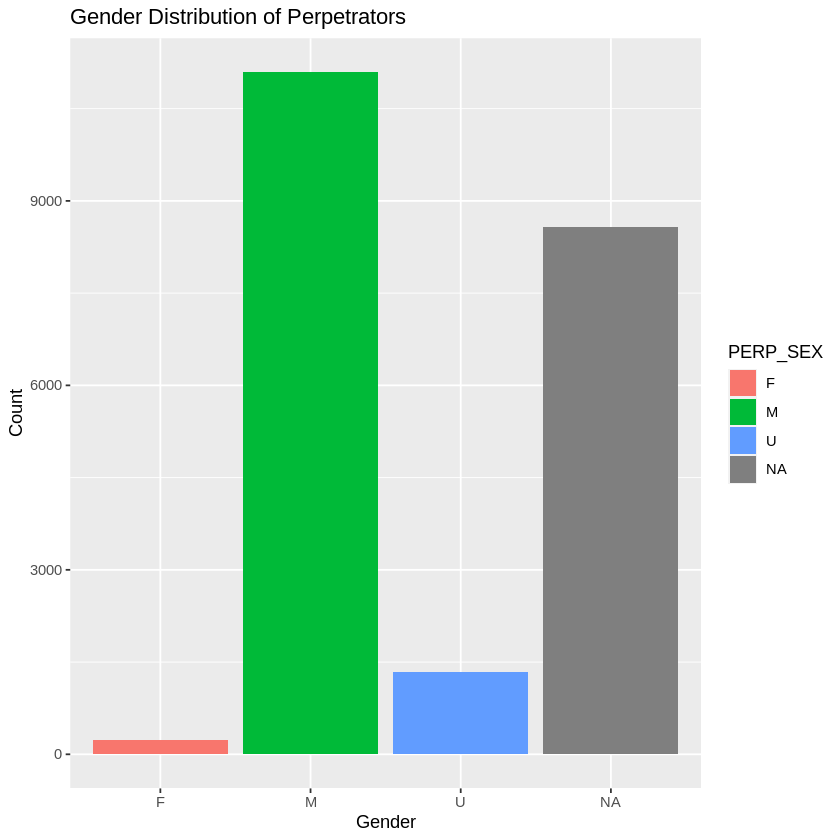

In [ ]:
# Creating bar charts for gender distribution for perpertrators
ggplot(shooting_incident_level_data, aes(x = PERP_SEX, fill = PERP_SEX)) +
  geom_bar() +
  labs(title = "Gender Distribution of Perpetrators", x = "Gender", y = "Count")

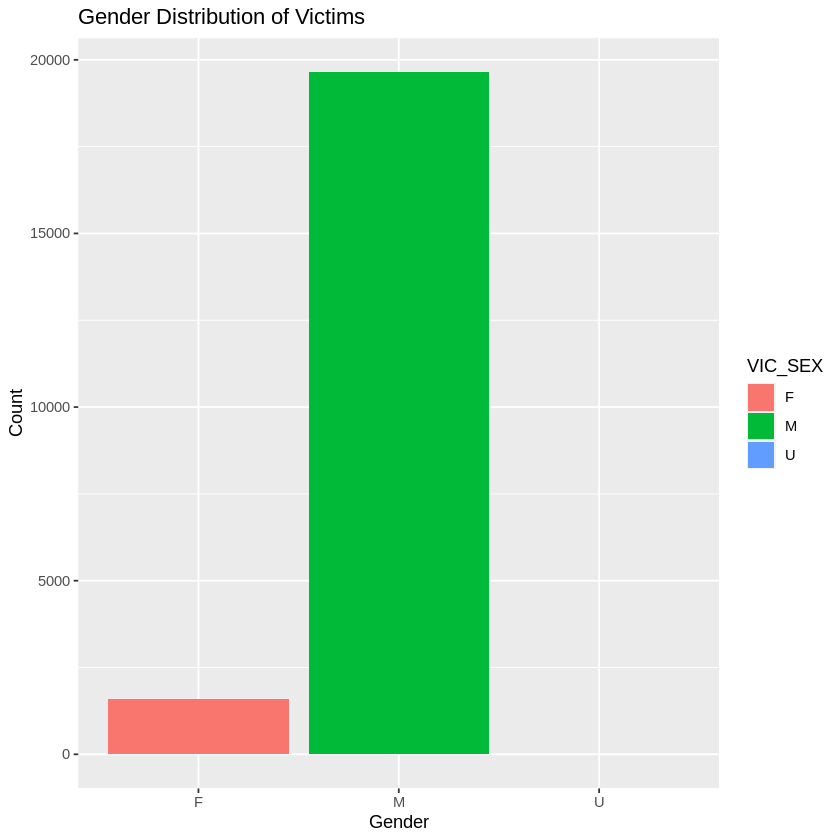

In [ ]:
ggplot(shooting_incident_level_data, aes(x = VIC_SEX, fill = VIC_SEX)) +
  geom_bar() +
  labs(title = "Gender Distribution of Victims", x = "Gender", y = "Count")

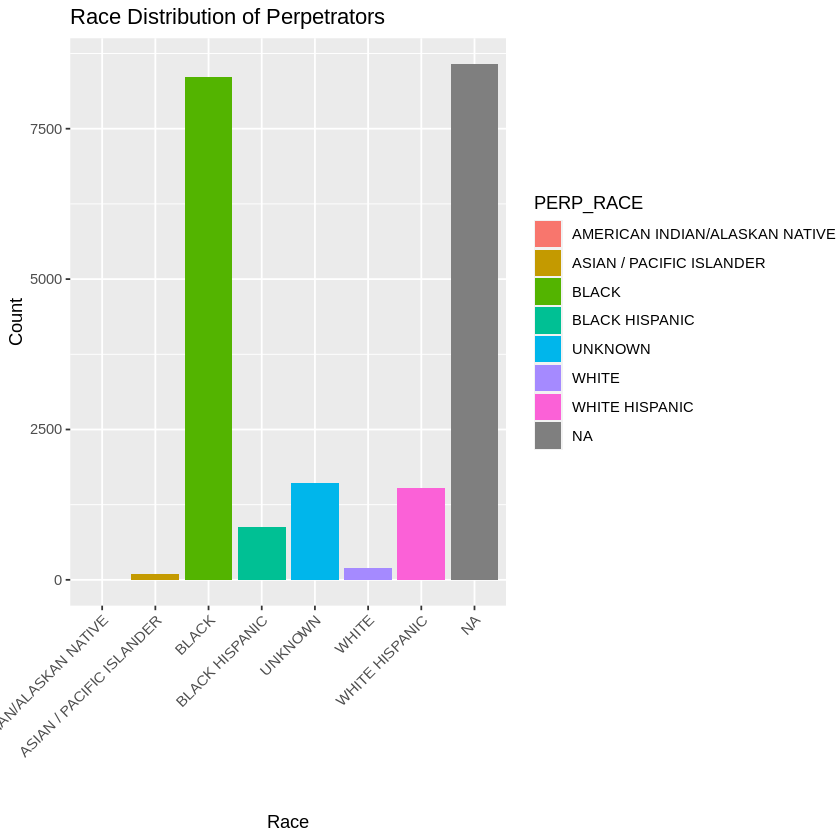

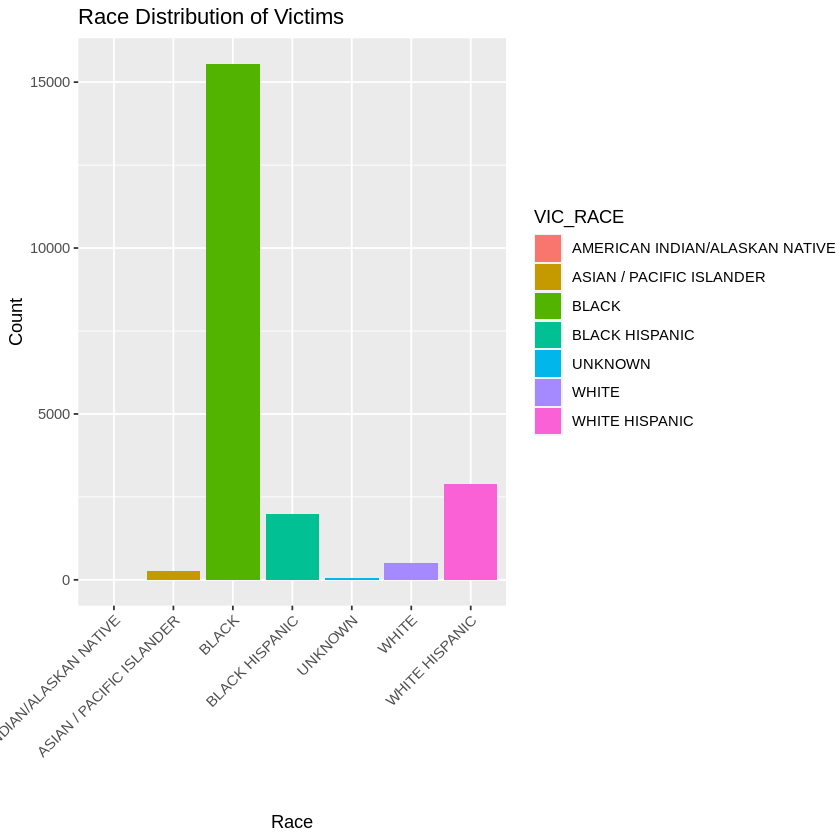

In [ ]:
library(ggplot2)

# Rotate x-axis labels by 45 degrees
ggplot(shooting_incident_level_data, aes(x = PERP_RACE, fill = PERP_RACE)) +
  geom_bar() +
  labs(title = "Race Distribution of Perpetrators", x = "Race", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggplot(shooting_incident_level_data, aes(x = VIC_RACE, fill = VIC_RACE)) +
  geom_bar() +
  labs(title = "Race Distribution of Victims", x = "Race", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

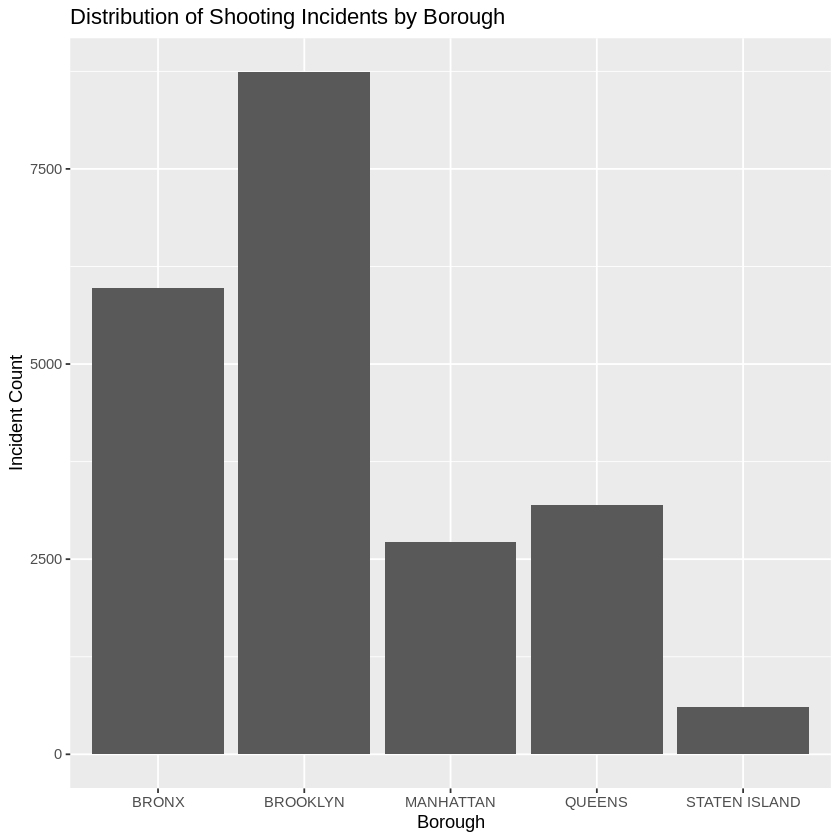

In [ ]:
# Loading the ggplot2 library
library(ggplot2)

# Creating a bar plot of shooting incidents by borough
ggplot(shooting_incident_level_data, aes(x = BORO)) +
  geom_bar() +
  labs(title = "Distribution of Shooting Incidents by Borough",
       x = "Borough",
       y = "Incident Count")


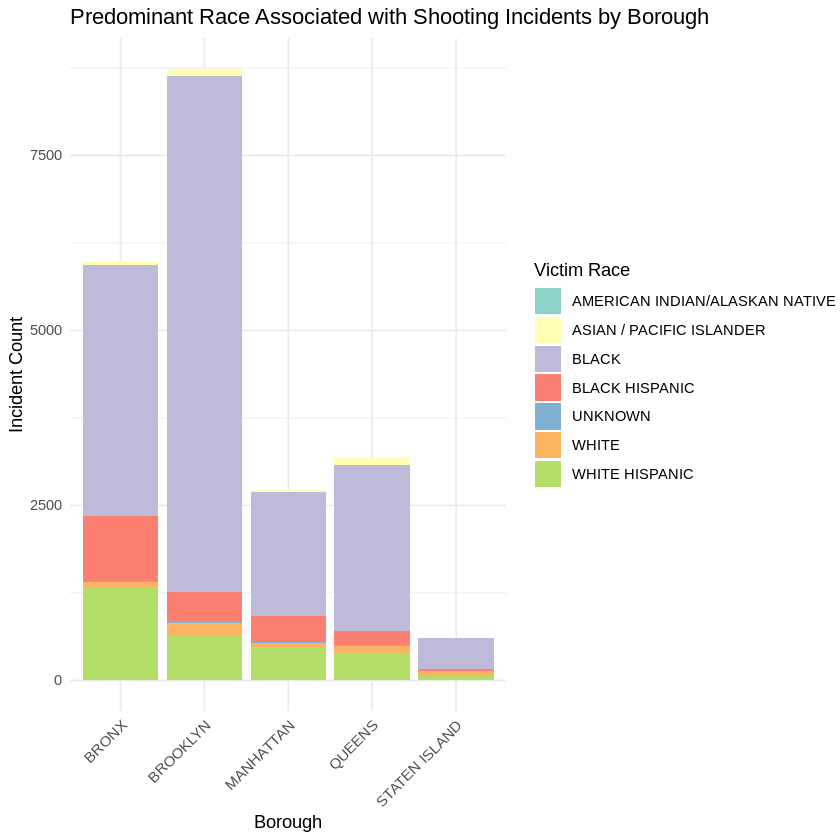

In [ ]:
# Creating a table summarizing the counts of victim races by borough
race_summary <- table(shooting_incident_level_data$BORO, shooting_incident_level_data$VIC_RACE)

# Converting the table to a data frame
race_summary_df <- as.data.frame(race_summary)

# Renaming columns for clarity
colnames(race_summary_df) <- c("BORO", "Race", "Count")

# Calculating the predominant race by borough
predominant_race <- race_summary_df %>%
  group_by(BORO) %>%
  slice(which.max(Count))

# Creating a stacked bar plot
ggplot(race_summary_df, aes(x = BORO, y = Count, fill = Race)) +
  geom_bar(stat = "identity") +
  labs(title = "Predominant Race Associated with Shooting Incidents by Borough",
       x = "Borough",
       y = "Incident Count",
       fill = "Victim Race") +
  scale_fill_brewer(palette = "Set3") +  # Choose a color palette
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

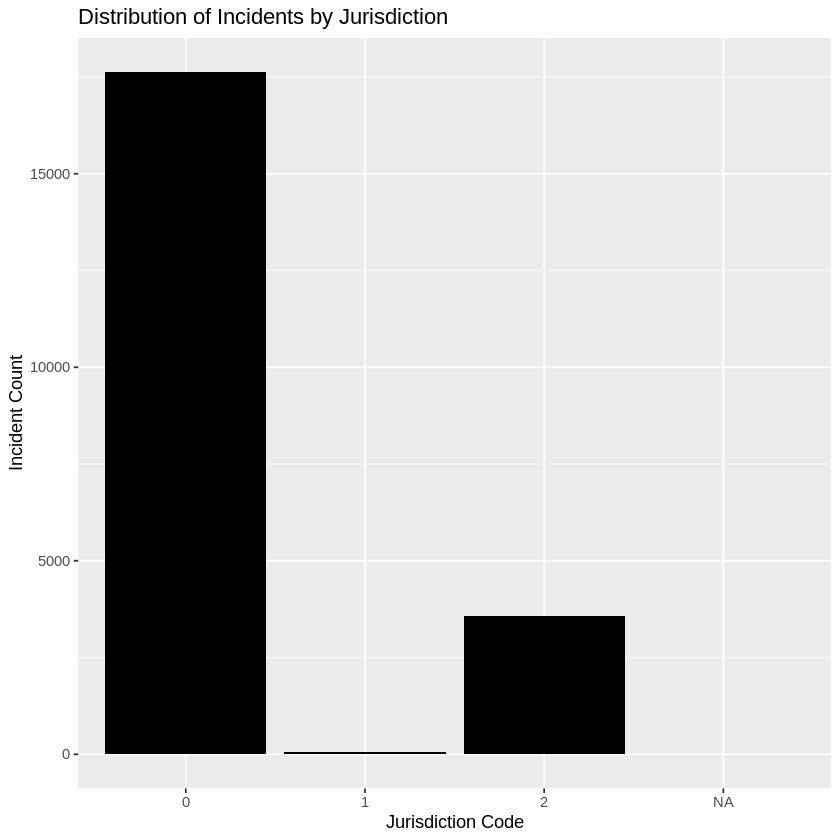

In [ ]:
# Checking the distribution of incidents by jurisdiction
incident_counts <- shooting_incident_level_data %>%
  group_by(JURISDICTION_CODE) %>%
  summarise(incident_count = n())

# Creating a bar chart to visualize the distribution
ggplot(incident_counts, aes(x = JURISDICTION_CODE, y = incident_count)) +
  geom_bar(stat = "identity", fill = "black") +
  labs(title = "Distribution of Incidents by Jurisdiction", x = "Jurisdiction Code", y = "Incident Count")


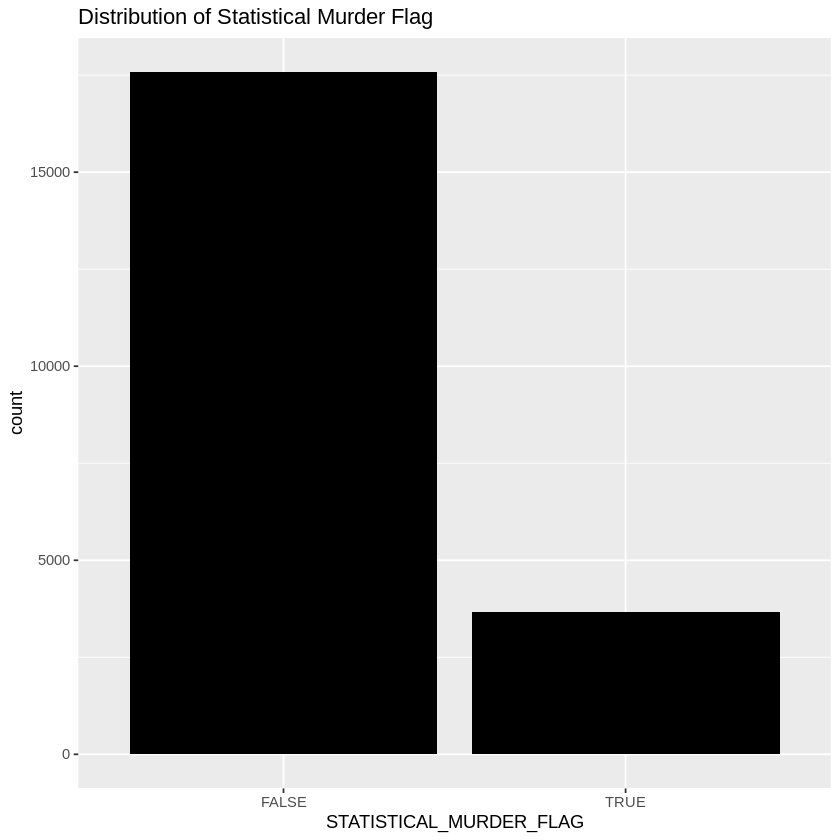

In [ ]:
# Bar plot for STATISTICAL_MURDER_FLAG
ggplot(shooting_incident_level_data, aes(x = STATISTICAL_MURDER_FLAG)) +
  geom_bar(fill = "black") +
  labs(title = "Distribution of Statistical Murder Flag")

HANDLING MISSING VALUES

In [ ]:
library(stats)

In [ ]:
# Filtering rows with missing values in perpetrator-related columns
missing_perpetrator_data <- subset(shooting_incident_level_data,
                                   is.na(PERP_RACE) | is.na(PERP_SEX) | is.na(PERP_AGE_GROUP))


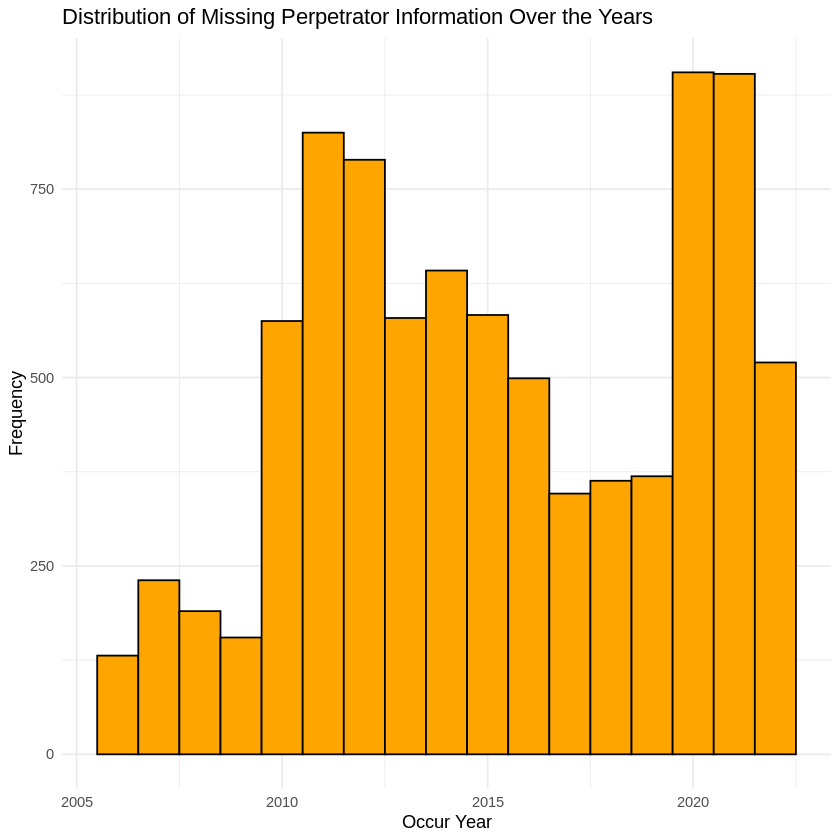

In [ ]:
library(ggplot2)

ggplot(data = missing_perpetrator_data, aes(x = OCCUR_YEAR)) +
  geom_histogram(binwidth = 1, fill = "orange", color = "black") +
  labs(
    title = "Distribution of Missing Perpetrator Information Over the Years",
    x = "Occur Year",
    y = "Frequency"
  ) +
  theme_minimal()


In [ ]:
# Filtering rows for the specified years with high missing values
selected_years <- c(2010, 2011, 2012, 2013, 2014, 2015, 2016, 2020, 2021, 2022)
missing_perpetrator_data1 <- subset(shooting_incident_level_data,
                                   OCCUR_YEAR %in% selected_years)

# Calculating the percentage of missing values for each column
missing_percentage <- colMeans(is.na(missing_perpetrator_data1)) * 100
print(missing_percentage)


           INCIDENT_KEY              OCCUR_DATE                    BORO 
             0.00000000              0.00000000              0.00000000 
      LOC_OF_OCCUR_DESC                PRECINCT       JURISDICTION_CODE 
            90.19622873              0.00000000              0.00000000 
     LOC_CLASSFCTN_DESC           LOCATION_DESC STATISTICAL_MURDER_FLAG 
            90.19622873             60.94588380              0.00000000 
         PERP_AGE_GROUP                PERP_SEX               PERP_RACE 
            52.27655987             52.27655987             52.27655987 
          VIC_AGE_GROUP                 VIC_SEX                VIC_RACE 
             0.00000000              0.00000000              0.00000000 
             X_COORD_CD              Y_COORD_CD                Latitude 
             0.00000000              0.00000000              0.06898666 
              Longitude                 Lon_Lat            VICTIM_COUNT 
             0.06898666              0.06898666    

In [ ]:
# Calculating the percentage of missing values for each column in the entire dataset
missing_percentage <- colMeans(is.na(shooting_incident_level_data)) * 100
print(missing_percentage)


           INCIDENT_KEY              OCCUR_DATE                    BORO 
            0.000000000             0.000000000             0.000000000 
      LOC_OF_OCCUR_DESC                PRECINCT       JURISDICTION_CODE 
           93.980326634             0.000000000             0.009413094 
     LOC_CLASSFCTN_DESC           LOCATION_DESC STATISTICAL_MURDER_FLAG 
           93.980326634            59.471925448             0.000000000 
         PERP_AGE_GROUP                PERP_SEX               PERP_RACE 
           40.499835271            40.358638867            40.358638867 
          VIC_AGE_GROUP                 VIC_SEX                VIC_RACE 
            0.000000000             0.000000000             0.000000000 
             X_COORD_CD              Y_COORD_CD                Latitude 
            0.000000000             0.000000000             0.042358921 
              Longitude                 Lon_Lat            VICTIM_COUNT 
            0.042358921             0.042358921    

In [ ]:
# Filtering rows with missing values in location-related columns
missing_location_data <- subset(shooting_incident_level_data,
                                   is.na(LOC_CLASSFCTN_DESC) | is.na(LOC_OF_OCCUR_DESC))

In [ ]:
# Calculating the percentage of missing values for each column
missing_percentage <- colMeans(is.na(missing_location_data)) * 100
print(missing_percentage)


           INCIDENT_KEY              OCCUR_DATE                    BORO 
             0.00000000              0.00000000              0.00000000 
      LOC_OF_OCCUR_DESC                PRECINCT       JURISDICTION_CODE 
           100.00000000              0.00000000              0.01001603 
     LOC_CLASSFCTN_DESC           LOCATION_DESC STATISTICAL_MURDER_FLAG 
           100.00000000             59.56530449              0.00000000 
         PERP_AGE_GROUP                PERP_SEX               PERP_RACE 
            40.48978365             40.33954327             40.33954327 
          VIC_AGE_GROUP                 VIC_SEX                VIC_RACE 
             0.00000000              0.00000000              0.00000000 
             X_COORD_CD              Y_COORD_CD                Latitude 
             0.00000000              0.00000000              0.00000000 
              Longitude                 Lon_Lat            VICTIM_COUNT 
             0.00000000              0.00000000    

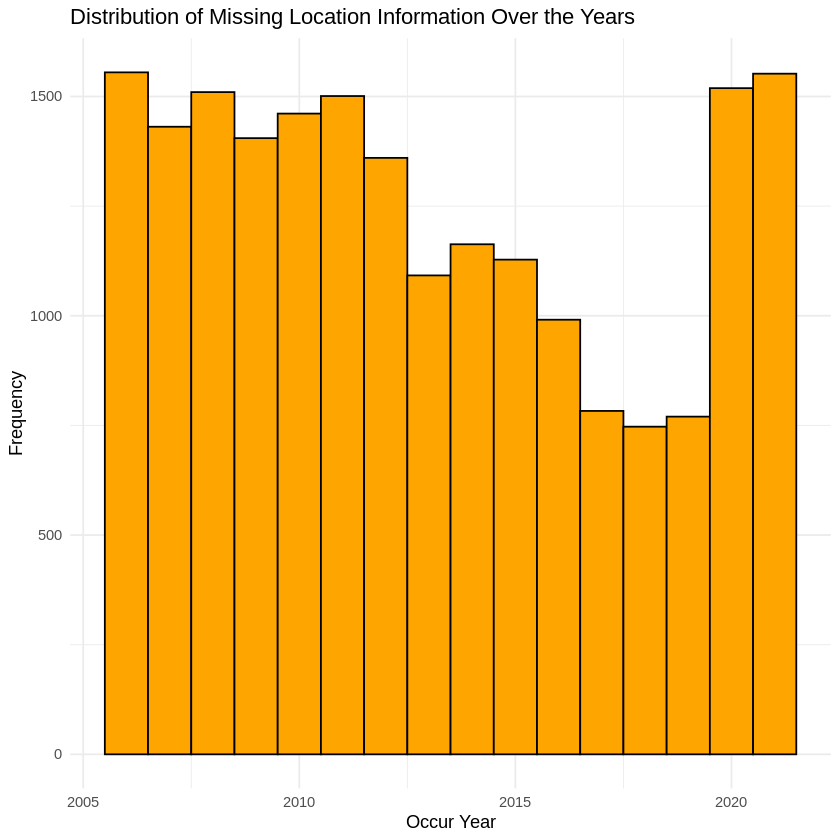

In [ ]:
library(ggplot2)

ggplot(data = missing_location_data, aes(x = OCCUR_YEAR)) +
  geom_histogram(binwidth = 1, fill = "orange", color = "black") +
  labs(
    title = "Distribution of Missing Location Information Over the Years",
    x = "Occur Year",
    y = "Frequency"
  ) +
  theme_minimal()

In [ ]:
head(shooting_incident_level_data)

,INCIDENT_KEY,OCCUR_DATE,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,⋯,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,VICTIM_COUNT,OCCUR_YEAR,OCCUR_DATETIME,DayOfWeek,HourOfDay
,<chr>,<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dttm>,<chr>,<dbl>
1,228798151,2021-05-27,QUEENS,NA,105,0,NA,NA,FALSE,NA,⋯,1058925,180924.0,40.66296,-73.73084,POINT (-73.73083868899994 40.662964620000025),2,2021,2021-05-27 21:30:00,Thursday,21
2,137471050,2014-06-27,BRONX,NA,40,0,NA,NA,FALSE,NA,⋯,1005028,234516.0,40.81035,-73.92494,POINT (-73.92494232599995 40.81035186300006),1,2014,2014-06-27 17:40:00,Friday,17
3,147998800,2015-11-21,QUEENS,NA,108,0,NA,NA,TRUE,NA,⋯,1007668,209836.5,40.74261,-73.91549,POINT (-73.91549174199997 40.74260663300004),1,2015,2015-11-21 03:56:00,Saturday,3
4,146837977,2015-10-09,BRONX,NA,44,0,NA,NA,FALSE,NA,⋯,1006537,244511.1,40.83778,-73.91946,POINT (-73.91945661499994 40.83778200300003),1,2015,2015-10-09 18:30:00,Friday,18
5,58921844,2009-02-19,BRONX,NA,47,0,NA,NA,TRUE,25-44,⋯,1024922,262189.4,40.88624,-73.85291,POINT (-73.85290950899997 40.88623791800006),1,2009,2009-02-19 22:58:00,Thursday,22
6,219559682,2020-10-21,BROOKLYN,NA,81,0,NA,NA,TRUE,NA,⋯,1004234,186461.7,40.67846,-73.92795,POINT (-73.92795224099996 40.678456718000064),1,2020,2020-10-21 21:36:00,Wednesday,21


In [ ]:
library(dplyr)
# Creating a final dataset for handling missing values
final_shooting_dataset <- shooting_incident_level_data %>%
  select(-LOC_CLASSFCTN_DESC, -LOC_OF_OCCUR_DESC)


In [ ]:
# Creating an initial dataset for comparison purposes
initial_shooting_dataset <- shooting_incident_level_data %>%
  select(-LOC_CLASSFCTN_DESC, -LOC_OF_OCCUR_DESC)


In [ ]:
str(final_shooting_dataset$OCCUR_YEAR)


 num [1:21247] 2021 2014 2015 2015 2009 ...


In [ ]:
# Converting OCCUR_YEAR to numeric
final_shooting_dataset$OCCUR_YEAR <- as.numeric(final_shooting_dataset$OCCUR_YEAR)

# Defining a vector of meaningful years
valid_years <- c(2006:2022)

# Filtering the dataset to keep only rows with meaningful years
final_shooting_dataset <- final_shooting_dataset[final_shooting_dataset$OCCUR_YEAR %in% valid_years, ]


In [ ]:
# Converting OCCUR_YEAR to numeric
initial_shooting_dataset$OCCUR_YEAR <- as.numeric(initial_shooting_dataset$OCCUR_YEAR)

# Defining a vector of meaningful years
valid_years <- c(2006:2022)

# Filtering the dataset to keep only rows with meaningful years
initial_shooting_dataset <- initial_shooting_dataset[initial_shooting_dataset$OCCUR_YEAR %in% valid_years, ]

In [ ]:
unique(final_shooting_dataset$OCCUR_YEAR)


[1] 2021 2014 2015 2009 2020 2012 2010 2011 2008 2007 2006 2017 2016 2013 2018
[16] 2019 2022

In [ ]:
unique(initial_shooting_dataset$OCCUR_YEAR)

[1] 2021 2014 2015 2009 2020 2012 2010 2011 2008 2007 2006 2017 2016 2013 2018
[16] 2019 2022

In [ ]:
summary(final_shooting_dataset)

 INCIDENT_KEY         OCCUR_DATE                    BORO         PRECINCT    
 Length:21247       Min.   :2006-01-01   BRONX        :5978   75     : 1220  
 Class :character   1st Qu.:2009-08-02   BROOKLYN     :8737   73     : 1167  
 Mode  :character   Median :2013-06-14   MANHATTAN    :2723   67     :  992  
                    Mean   :2014-01-17   QUEENS       :3198   79     :  798  
                    3rd Qu.:2018-09-23   STATEN ISLAND: 611   44     :  743  
                    Max.   :2022-12-31                        47     :  743  
                                                              (Other):15584  
 JURISDICTION_CODE                   LOCATION_DESC   STATISTICAL_MURDER_FLAG
 0   :17619        MULTI DWELL - PUBLIC HOUS: 3863   Mode :logical          
 1   :   55        MULTI DWELL - APT BUILD  : 2106   FALSE:17571            
 2   : 3571        PVT HOUSE                :  664   TRUE :3676             
 NA's:    2        GROCERY/BODEGA           :  508                  

In [ ]:
unique_values <- unique(final_shooting_dataset$LOCATION_DESC)

# Printing the unique values in the Location_desc column
print(unique_values)

 [1] <NA>                      MULTI DWELL - APT BUILD  
 [3] MULTI DWELL - PUBLIC HOUS GROCERY/BODEGA           
 [5] JEWELRY STORE             CLOTHING BOUTIQUE        
 [7] GAS STATION               BAR/NIGHT CLUB           
 [9] PVT HOUSE                 NONE                     
[11] COMMERCIAL BLDG           SMALL MERCHANT           
[13] BEAUTY/NAIL SALON         FAST FOOD                
[15] DRUG STORE                TELECOMM. STORE          
[17] DRY CLEANER/LAUNDRY       RESTAURANT/DINER         
[19] HOTEL/MOTEL               SOCIAL CLUB/POLICY LOCATI
[21] SUPERMARKET               CHAIN STORE              
[23] HOSPITAL                  LIQUOR STORE             
[25] STORE UNCLASSIFIED        FACTORY/WAREHOUSE        
[27] DEPT STORE                SHOE STORE               
[29] VARIETY STORE             BANK                     
[31] ATM                       DOCTOR/DENTIST           
[33] GYM/FITNESS FACILITY      CANDY STORE              
[35] VIDEO STORE               

In [ ]:
head(final_shooting_dataset)

,INCIDENT_KEY,OCCUR_DATE,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,⋯,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,VICTIM_COUNT,OCCUR_YEAR,OCCUR_DATETIME,DayOfWeek,HourOfDay
,<chr>,<date>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dttm>,<chr>,<dbl>
1,228798151,2021-05-27,QUEENS,105,0,NA,FALSE,NA,NA,NA,⋯,1058925,180924.0,40.66296,-73.73084,POINT (-73.73083868899994 40.662964620000025),2,2021,2021-05-27 21:30:00,Thursday,21
2,137471050,2014-06-27,BRONX,40,0,NA,FALSE,NA,NA,NA,⋯,1005028,234516.0,40.81035,-73.92494,POINT (-73.92494232599995 40.81035186300006),1,2014,2014-06-27 17:40:00,Friday,17
3,147998800,2015-11-21,QUEENS,108,0,NA,TRUE,NA,NA,NA,⋯,1007668,209836.5,40.74261,-73.91549,POINT (-73.91549174199997 40.74260663300004),1,2015,2015-11-21 03:56:00,Saturday,3
4,146837977,2015-10-09,BRONX,44,0,NA,FALSE,NA,NA,NA,⋯,1006537,244511.1,40.83778,-73.91946,POINT (-73.91945661499994 40.83778200300003),1,2015,2015-10-09 18:30:00,Friday,18
5,58921844,2009-02-19,BRONX,47,0,NA,TRUE,25-44,M,BLACK,⋯,1024922,262189.4,40.88624,-73.85291,POINT (-73.85290950899997 40.88623791800006),1,2009,2009-02-19 22:58:00,Thursday,22
6,219559682,2020-10-21,BROOKLYN,81,0,NA,TRUE,NA,NA,NA,⋯,1004234,186461.7,40.67846,-73.92795,POINT (-73.92795224099996 40.678456718000064),1,2020,2020-10-21 21:36:00,Wednesday,21


In [ ]:
# Counting missing values in each column
missing_counts <- colSums(is.na(final_shooting_dataset))
print(missing_counts)

           INCIDENT_KEY              OCCUR_DATE                    BORO 
                      0                       0                       0 
               PRECINCT       JURISDICTION_CODE           LOCATION_DESC 
                      0                       2                   12636 
STATISTICAL_MURDER_FLAG          PERP_AGE_GROUP                PERP_SEX 
                      0                    8605                    8575 
              PERP_RACE           VIC_AGE_GROUP                 VIC_SEX 
                   8575                       0                       0 
               VIC_RACE              X_COORD_CD              Y_COORD_CD 
                      0                       0                       0 
               Latitude               Longitude                 Lon_Lat 
                      9                       9                       9 
           VICTIM_COUNT              OCCUR_YEAR          OCCUR_DATETIME 
                      0                       0    

In [ ]:
# Counting missing values in each column
missing_counts <- colSums(is.na(initial_shooting_dataset))
print(missing_counts)

           INCIDENT_KEY              OCCUR_DATE                    BORO 
                      0                       0                       0 
               PRECINCT       JURISDICTION_CODE           LOCATION_DESC 
                      0                       2                   12636 
STATISTICAL_MURDER_FLAG          PERP_AGE_GROUP                PERP_SEX 
                      0                    8605                    8575 
              PERP_RACE           VIC_AGE_GROUP                 VIC_SEX 
                   8575                       0                       0 
               VIC_RACE              X_COORD_CD              Y_COORD_CD 
                      0                       0                       0 
               Latitude               Longitude                 Lon_Lat 
                      9                       9                       9 
           VICTIM_COUNT              OCCUR_YEAR          OCCUR_DATETIME 
                      0                       0    

In [ ]:
# Removing rows with missing values in the "Lon_Lat" column of the final dataset
final_shooting_dataset <- final_shooting_dataset[complete.cases(final_shooting_dataset$Lon_Lat),]

In [ ]:
# Removing rows with missing values in the "Lon_Lat" column of the initial dataset
initial_shooting_dataset <- initial_shooting_dataset[complete.cases(initial_shooting_dataset$Lon_Lat),]

In [ ]:
# Removing rows with missing values in the "JURISDICTION_CODE" column of the final dataset
final_shooting_dataset <- final_shooting_dataset[complete.cases(final_shooting_dataset$JURISDICTION_CODE),]

In [ ]:
# Removing rows with missing values in the "JURISDICTION_CODE" column of the initial dataset
initial_shooting_dataset <- initial_shooting_dataset[complete.cases(initial_shooting_dataset$JURISDICTION_CODE),]

In [ ]:
# Counting missing values in each column
missing_counts <- colSums(is.na(final_shooting_dataset))
print(missing_counts)

           INCIDENT_KEY              OCCUR_DATE                    BORO 
                      0                       0                       0 
               PRECINCT       JURISDICTION_CODE           LOCATION_DESC 
                      0                       0                   12627 
STATISTICAL_MURDER_FLAG          PERP_AGE_GROUP                PERP_SEX 
                      0                    8600                    8570 
              PERP_RACE           VIC_AGE_GROUP                 VIC_SEX 
                   8570                       0                       0 
               VIC_RACE              X_COORD_CD              Y_COORD_CD 
                      0                       0                       0 
               Latitude               Longitude                 Lon_Lat 
                      0                       0                       0 
           VICTIM_COUNT              OCCUR_YEAR          OCCUR_DATETIME 
                      0                       0    

In [ ]:
# Counting missing values in each column
missing_counts <- colSums(is.na(initial_shooting_dataset))
print(missing_counts)

           INCIDENT_KEY              OCCUR_DATE                    BORO 
                      0                       0                       0 
               PRECINCT       JURISDICTION_CODE           LOCATION_DESC 
                      0                       0                   12627 
STATISTICAL_MURDER_FLAG          PERP_AGE_GROUP                PERP_SEX 
                      0                    8600                    8570 
              PERP_RACE           VIC_AGE_GROUP                 VIC_SEX 
                   8570                       0                       0 
               VIC_RACE              X_COORD_CD              Y_COORD_CD 
                      0                       0                       0 
               Latitude               Longitude                 Lon_Lat 
                      0                       0                       0 
           VICTIM_COUNT              OCCUR_YEAR          OCCUR_DATETIME 
                      0                       0    

In [ ]:
# Step 1: Creating Missing-Value Indicator Columns for PERP_RACE, PERP_SEX, PERP_AGE_GROUP, LOCATION_DESC
columns_to_impute <- c("PERP_RACE", "PERP_SEX", "PERP_AGE_GROUP", "LOCATION_DESC")

for (col in columns_to_impute) {
  # Creating a new binary indicator column with a meaningful name
  indicator_col <- paste0(col, "_missing")

  # Populating the indicator column with 1 if the corresponding value was missing and 0 otherwise
  final_shooting_dataset[[indicator_col]] <- ifelse(is.na(final_shooting_dataset[[col]]), 1, 0)
}

# Step 2: Mode Imputation for PERP_RACE, PERP_SEX, PERP_AGE_GROUP, LOCATION_DESC
for (col in columns_to_impute) {
  # Computing the mode (most frequent category) excluding missing values
  freq_table <- table(final_shooting_dataset[[col]])
  mode_val <- names(freq_table)[which.max(freq_table)]

  # Replacing missing values with the mode value
  final_shooting_dataset[[col]][is.na(final_shooting_dataset[[col]])] <- mode_val
}


In [ ]:
summary(final_shooting_dataset[, c("PERP_RACE_missing", "PERP_SEX_missing", "PERP_AGE_GROUP_missing", "LOCATION_DESC_missing")])


 PERP_RACE_missing PERP_SEX_missing PERP_AGE_GROUP_missing
 Min.   :0.0000    Min.   :0.0000   Min.   :0.000         
 1st Qu.:0.0000    1st Qu.:0.0000   1st Qu.:0.000         
 Median :0.0000    Median :0.0000   Median :0.000         
 Mean   :0.4036    Mean   :0.4036   Mean   :0.405         
 3rd Qu.:1.0000    3rd Qu.:1.0000   3rd Qu.:1.000         
 Max.   :1.0000    Max.   :1.0000   Max.   :1.000         
 LOCATION_DESC_missing
 Min.   :0.0000       
 1st Qu.:0.0000       
 Median :1.0000       
 Mean   :0.5946       
 3rd Qu.:1.0000       
 Max.   :1.0000       

In [ ]:
summary(final_shooting_dataset[, c("PERP_RACE", "PERP_SEX", "PERP_AGE_GROUP", "LOCATION_DESC")])


                          PERP_RACE     PERP_SEX  PERP_AGE_GROUP 
 AMERICAN INDIAN/ALASKAN NATIVE:    2   F:  236   <18    : 1086  
 ASIAN / PACIFIC ISLANDER      :   97   M:19654   18-24  :12944  
 BLACK                         :16919   U: 1346   25-44  : 4065  
 BLACK HISPANIC                :  885             45-64  :  417  
 UNKNOWN                       : 1615             UNKNOWN: 2724  
 WHITE                         :  195                            
 WHITE HISPANIC                : 1523                            
                   LOCATION_DESC  
 MULTI DWELL - PUBLIC HOUS:16489  
 MULTI DWELL - APT BUILD  : 2106  
 PVT HOUSE                :  664  
 GROCERY/BODEGA           :  508  
 BAR/NIGHT CLUB           :  422  
 COMMERCIAL BLDG          :  212  
 (Other)                  :  835  

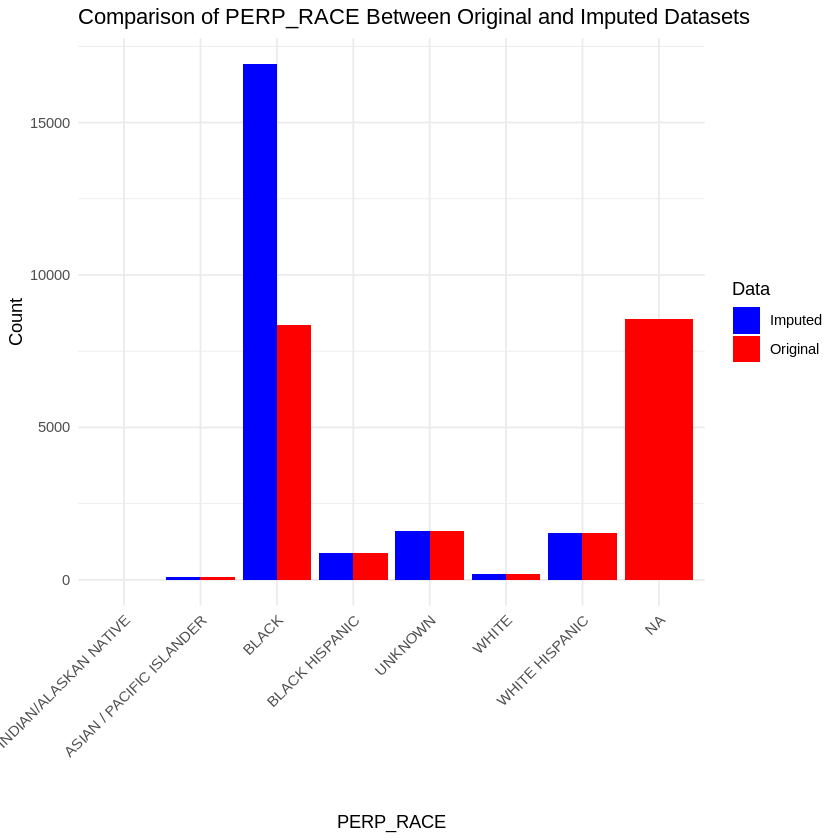

In [ ]:
library(ggplot2)

# Creating a combined data frame for plotting
combined_df <- rbind(
  data.frame(Data = "Original", PERP_RACE = initial_shooting_dataset$PERP_RACE),
  data.frame(Data = "Imputed", PERP_RACE = final_shooting_dataset$PERP_RACE)
)

# Creating a grouped bar chart
ggplot(combined_df, aes(x = PERP_RACE, fill = Data)) +
  geom_bar(position = "dodge") +
  labs(title = "Comparison of PERP_RACE Between Original and Imputed Datasets",
       x = "PERP_RACE",
       y = "Count") +
  scale_fill_manual(values = c("Original" = "red", "Imputed" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

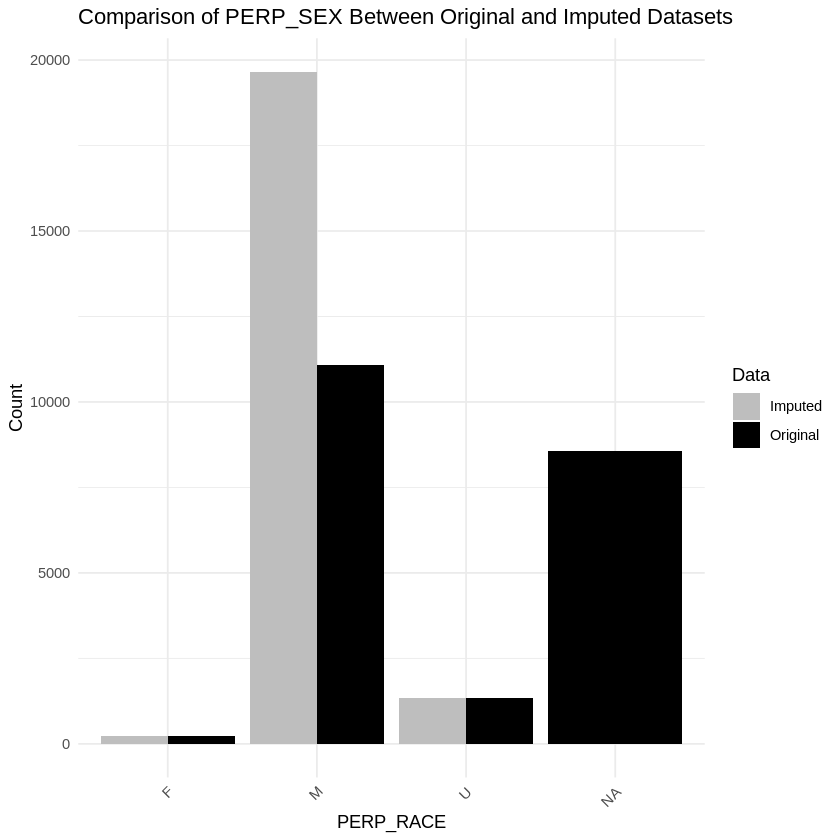

In [ ]:
# Creating a combined data frame for plotting
combined_df <- rbind(
  data.frame(Data = "Original", PERP_SEX = initial_shooting_dataset$PERP_SEX),
  data.frame(Data = "Imputed", PERP_SEX = final_shooting_dataset$PERP_SEX)
)

# Creating a grouped bar chart
ggplot(combined_df, aes(x = PERP_SEX, fill = Data)) +
  geom_bar(position = "dodge") +
  labs(title = "Comparison of PERP_SEX Between Original and Imputed Datasets",
       x = "PERP_RACE",
       y = "Count") +
  scale_fill_manual(values = c("Original" = "black", "Imputed" = "grey")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

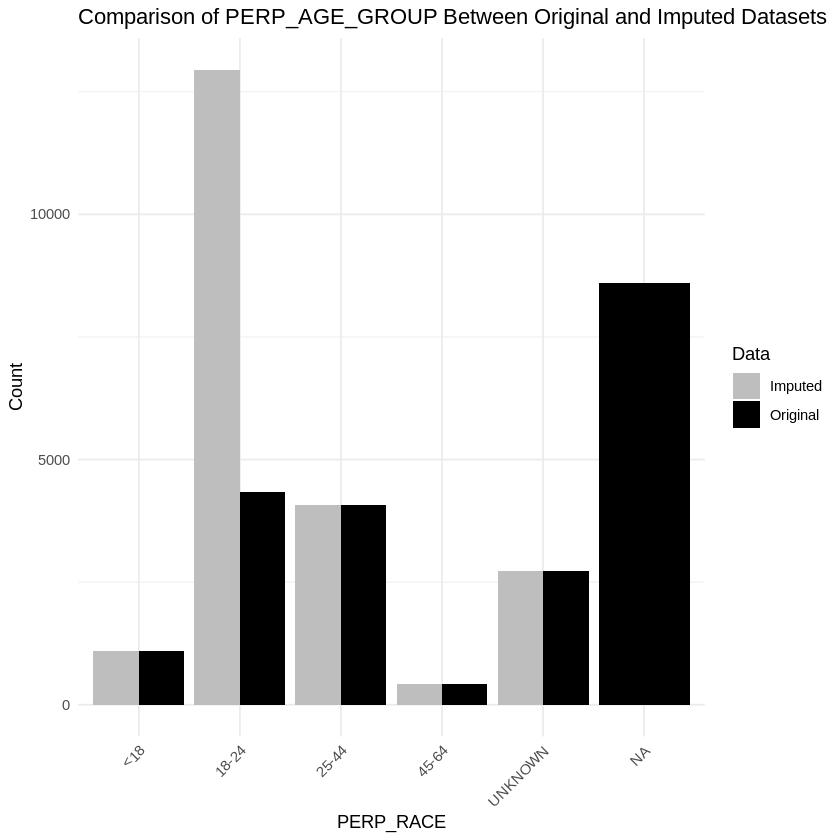

In [ ]:
# Creating a combined data frame for plotting
combined_df <- rbind(
  data.frame(Data = "Original", PERP_AGE_GROUP = initial_shooting_dataset$PERP_AGE_GROUP),
  data.frame(Data = "Imputed", PERP_AGE_GROUP = final_shooting_dataset$PERP_AGE_GROUP)
)

# Creating a grouped bar chart
ggplot(combined_df, aes(x = PERP_AGE_GROUP, fill = Data)) +
  geom_bar(position = "dodge") +
  labs(title = "Comparison of PERP_AGE_GROUP Between Original and Imputed Datasets",
       x = "PERP_RACE",
       y = "Count") +
  scale_fill_manual(values = c("Original" = "black", "Imputed" = "grey")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

In [ ]:
head(final_shooting_dataset)

,INCIDENT_KEY,OCCUR_DATE,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,⋯,Lon_Lat,VICTIM_COUNT,OCCUR_YEAR,OCCUR_DATETIME,DayOfWeek,HourOfDay,PERP_RACE_missing,PERP_SEX_missing,PERP_AGE_GROUP_missing,LOCATION_DESC_missing
,<chr>,<date>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,⋯,<chr>,<int>,<dbl>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,228798151,2021-05-27,QUEENS,105,0,MULTI DWELL - PUBLIC HOUS,FALSE,18-24,M,BLACK,⋯,POINT (-73.73083868899994 40.662964620000025),2,2021,2021-05-27 21:30:00,Thursday,21,1,1,1,1
2,137471050,2014-06-27,BRONX,40,0,MULTI DWELL - PUBLIC HOUS,FALSE,18-24,M,BLACK,⋯,POINT (-73.92494232599995 40.81035186300006),1,2014,2014-06-27 17:40:00,Friday,17,1,1,1,1
3,147998800,2015-11-21,QUEENS,108,0,MULTI DWELL - PUBLIC HOUS,TRUE,18-24,M,BLACK,⋯,POINT (-73.91549174199997 40.74260663300004),1,2015,2015-11-21 03:56:00,Saturday,3,1,1,1,1
4,146837977,2015-10-09,BRONX,44,0,MULTI DWELL - PUBLIC HOUS,FALSE,18-24,M,BLACK,⋯,POINT (-73.91945661499994 40.83778200300003),1,2015,2015-10-09 18:30:00,Friday,18,1,1,1,1
5,58921844,2009-02-19,BRONX,47,0,MULTI DWELL - PUBLIC HOUS,TRUE,25-44,M,BLACK,⋯,POINT (-73.85290950899997 40.88623791800006),1,2009,2009-02-19 22:58:00,Thursday,22,0,0,0,1
6,219559682,2020-10-21,BROOKLYN,81,0,MULTI DWELL - PUBLIC HOUS,TRUE,18-24,M,BLACK,⋯,POINT (-73.92795224099996 40.678456718000064),1,2020,2020-10-21 21:36:00,Wednesday,21,1,1,1,1


In [ ]:
# Counting missing values in each column
missing_counts <- colSums(is.na(final_shooting_dataset))
print(missing_counts)

           INCIDENT_KEY              OCCUR_DATE                    BORO 
                      0                       0                       0 
               PRECINCT       JURISDICTION_CODE           LOCATION_DESC 
                      0                       0                       0 
STATISTICAL_MURDER_FLAG          PERP_AGE_GROUP                PERP_SEX 
                      0                       0                       0 
              PERP_RACE           VIC_AGE_GROUP                 VIC_SEX 
                      0                       0                       0 
               VIC_RACE              X_COORD_CD              Y_COORD_CD 
                      0                       0                       0 
               Latitude               Longitude                 Lon_Lat 
                      0                       0                       0 
           VICTIM_COUNT              OCCUR_YEAR          OCCUR_DATETIME 
                      0                       0    

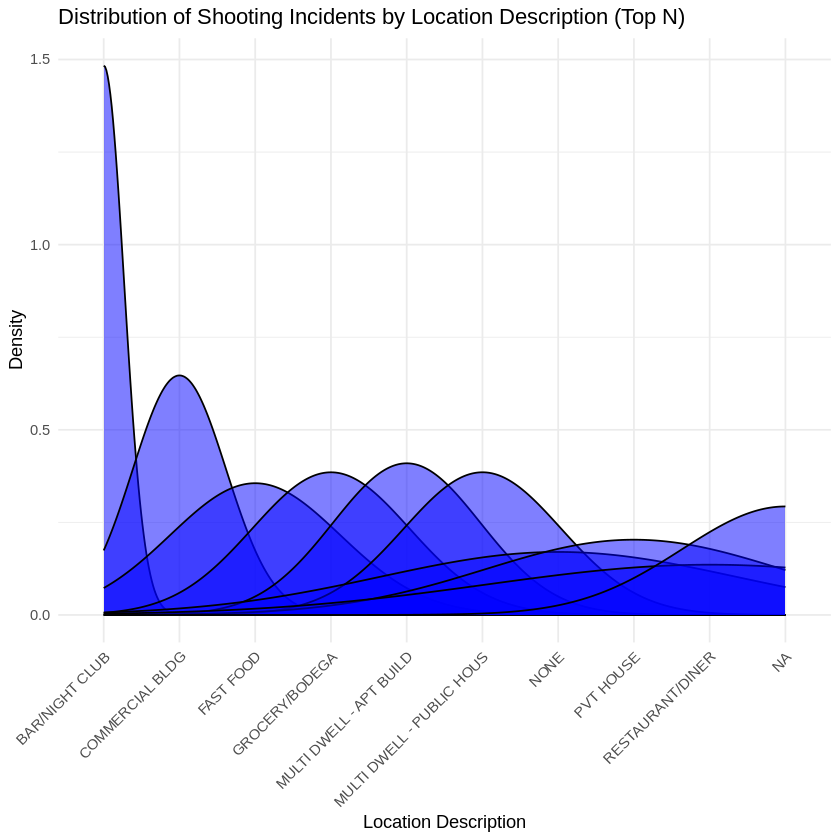

In [ ]:
library(ggplot2)
library(dplyr)

# Choosing the top 10 Location_desc categories to visualize
top_n_categories <- 10

# Extracting the top N categories by frequency from the initial shooting data
top_n_original <- initial_shooting_dataset %>%
  group_by(LOCATION_DESC) %>%
  summarize(freq = n()) %>%
  top_n(top_n_categories, wt = freq)

# Filtering the original data to include only the top N categories
filtered_original <- initial_shooting_dataset%>%
  filter(LOCATION_DESC %in% top_n_original$LOCATION_DESC)

# Creating a density plot for Location_desc in the filtered original data
ggplot(data = filtered_original, aes(x = LOCATION_DESC)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(title = "Distribution of Shooting Incidents by Location Description (Top N)",
       x = "Location Description",
       y = "Density") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels


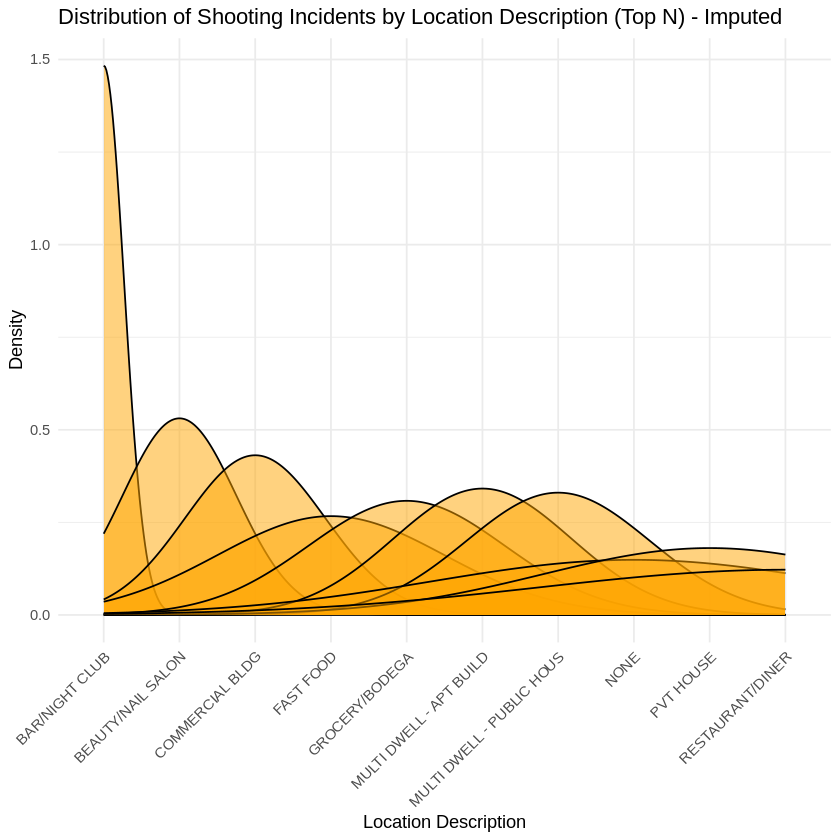

In [ ]:
# Choosing the top 10 categories to visualize
top_n_categories <- 10

# Extracting the top N categories by frequency from the imputed data
top_n_original <- final_shooting_dataset %>%
  group_by(LOCATION_DESC) %>%
  summarize(freq = n()) %>%
  top_n(top_n_categories, wt = freq)

# Filtering the imputed data to include only the top N categories
filtered_original <- initial_shooting_dataset%>%
  filter(LOCATION_DESC %in% top_n_original$LOCATION_DESC)

# Create a density plot for Location_desc in the filtered imputed data
ggplot(data = filtered_original, aes(x = LOCATION_DESC)) +
  geom_density(fill = "orange", alpha = 0.5) +
  labs(title = "Distribution of Shooting Incidents by Location Description (Top N) - Imputed",
       x = "Location Description",
       y = "Density") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

In [ ]:
head(final_shooting_dataset)

,INCIDENT_KEY,OCCUR_DATE,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,⋯,Lon_Lat,VICTIM_COUNT,OCCUR_YEAR,OCCUR_DATETIME,DayOfWeek,HourOfDay,PERP_RACE_missing,PERP_SEX_missing,PERP_AGE_GROUP_missing,LOCATION_DESC_missing
,<chr>,<date>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,⋯,<chr>,<int>,<dbl>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,228798151,2021-05-27,QUEENS,105,0,MULTI DWELL - PUBLIC HOUS,FALSE,18-24,M,BLACK,⋯,POINT (-73.73083868899994 40.662964620000025),2,2021,2021-05-27 21:30:00,Thursday,21,1,1,1,1
2,137471050,2014-06-27,BRONX,40,0,MULTI DWELL - PUBLIC HOUS,FALSE,18-24,M,BLACK,⋯,POINT (-73.92494232599995 40.81035186300006),1,2014,2014-06-27 17:40:00,Friday,17,1,1,1,1
3,147998800,2015-11-21,QUEENS,108,0,MULTI DWELL - PUBLIC HOUS,TRUE,18-24,M,BLACK,⋯,POINT (-73.91549174199997 40.74260663300004),1,2015,2015-11-21 03:56:00,Saturday,3,1,1,1,1
4,146837977,2015-10-09,BRONX,44,0,MULTI DWELL - PUBLIC HOUS,FALSE,18-24,M,BLACK,⋯,POINT (-73.91945661499994 40.83778200300003),1,2015,2015-10-09 18:30:00,Friday,18,1,1,1,1
5,58921844,2009-02-19,BRONX,47,0,MULTI DWELL - PUBLIC HOUS,TRUE,25-44,M,BLACK,⋯,POINT (-73.85290950899997 40.88623791800006),1,2009,2009-02-19 22:58:00,Thursday,22,0,0,0,1
6,219559682,2020-10-21,BROOKLYN,81,0,MULTI DWELL - PUBLIC HOUS,TRUE,18-24,M,BLACK,⋯,POINT (-73.92795224099996 40.678456718000064),1,2020,2020-10-21 21:36:00,Wednesday,21,1,1,1,1


DEMOGRAPHIC STATISTICAL TEST


In [ ]:
unique_values <- unique(final_shooting_dataset$PERP_RACE)
print(unique_values)

[1] BLACK                          UNKNOWN                       
[3] BLACK HISPANIC                 ASIAN / PACIFIC ISLANDER      
[5] WHITE HISPANIC                 WHITE                         
[7] AMERICAN INDIAN/ALASKAN NATIVE
7 Levels: AMERICAN INDIAN/ALASKAN NATIVE ASIAN / PACIFIC ISLANDER ... WHITE HISPANIC


In [ ]:
unique_values <- unique(final_shooting_dataset$VIC_RACE)
print(unique_values)

[1] BLACK                          WHITE                         
[3] WHITE HISPANIC                 BLACK HISPANIC                
[5] ASIAN / PACIFIC ISLANDER       UNKNOWN                       
[7] AMERICAN INDIAN/ALASKAN NATIVE
7 Levels: AMERICAN INDIAN/ALASKAN NATIVE ASIAN / PACIFIC ISLANDER ... WHITE HISPANIC


In [ ]:
# Excluding rows with "Unknown" in either columns
final_shooting_dataset <- final_shooting_dataset %>%
  filter(PERP_RACE != "UNKNOWN" & VIC_RACE != "UNKNOWN")

# Creating a contingency table
contingency_table <- table(final_shooting_dataset$PERP_RACE, final_shooting_dataset$VIC_RACE)

# Performing Fisher's exact test
result <- fisher.test(contingency_table, simulate.p.value = TRUE)

# Interpreting the results
print(result)



	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  contingency_table
p-value = 0.0004998
alternative hypothesis: two.sided



TEMPORAL STATISTICAL TEST

In [ ]:
# Creating a new variable for time periods
final_shooting_dataset <- final_shooting_dataset %>%
  mutate(
    Hour = hour(OCCUR_DATETIME),
    Time_Period = case_when(
      between(Hour, 6, 11) ~ "Morning",
      between(Hour, 12, 17) ~ "Afternoon",
      between(Hour, 18, 23) ~ "Evening",
      TRUE ~ "Night"
    )
  )


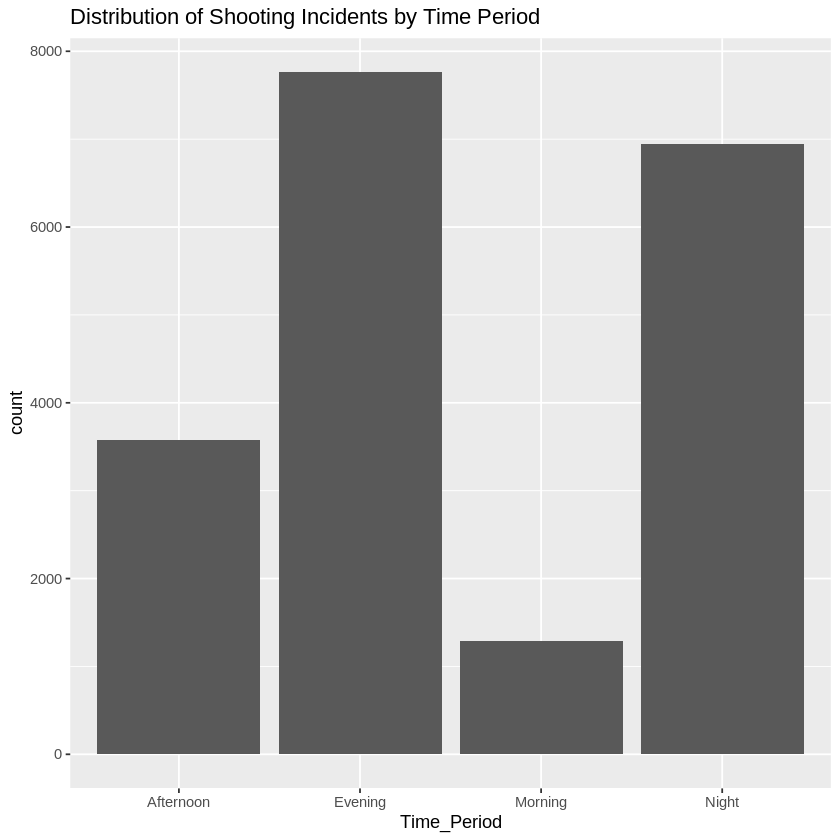

In [ ]:
library(ggplot2)

# Creating a bar plot of shooting incidents by time period
ggplot(final_shooting_dataset, aes(x = Time_Period)) +
  geom_bar() +
  labs(title = "Distribution of Shooting Incidents by Time Period")


In [ ]:
# Creating a contingency table
contingency_table <- table(final_shooting_dataset$Time_Period)

# Displaying the contingency table
print(contingency_table)



Afternoon   Evening   Morning     Night 
     3581      7760      1295      6941 


In [ ]:
# Performing a chi-squared test
chi_squared_result <- chisq.test(contingency_table)

# Interpreting the results
print(chi_squared_result)



	Chi-squared test for given probabilities

data:  contingency_table
X-squared = 5533.2, df = 3, p-value < 2.2e-16



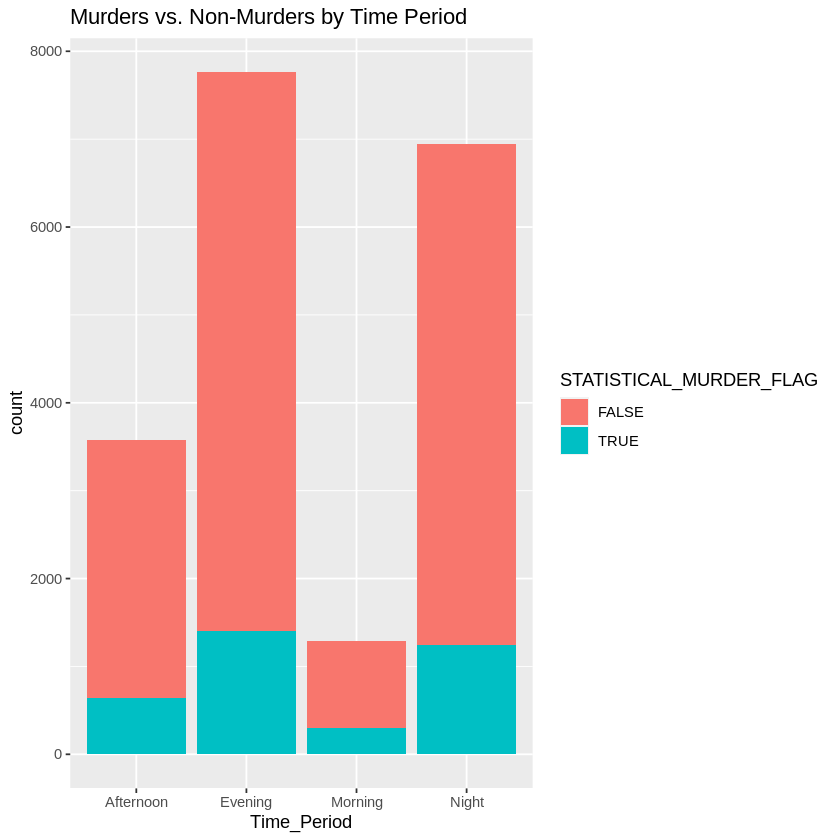

In [ ]:
# Creating a stacked bar chart of murders/non-murders by time period
ggplot(final_shooting_dataset, aes(x = Time_Period, fill = `STATISTICAL_MURDER_FLAG`)) +
  geom_bar() +
  labs(title = "Murders vs. Non-Murders by Time Period")



In [ ]:
# Creating a contingency table
contingency_table <- table(final_shooting_dataset$Time_Period, final_shooting_dataset$STATISTICAL_MURDER_FLAG)

# Performing the Chi-squared test
chi_squared_result <- chisq.test(contingency_table)

# Printing the result
print(chi_squared_result)



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 21.056, df = 3, p-value = 0.0001025



In [ ]:
# Performing pairwise chi-squared tests with Bonferroni correction
pairwise_chi_squared <- pairwise.prop.test(contingency_table, p.adjust.method = "bonferroni")

# Printing the results
print(pairwise_chi_squared)



	Pairwise comparisons using Pairwise comparison of proportions 

data:  contingency_table 

        Afternoon Evening Morning
Evening 1.00000   -       -      
Morning 0.00034   0.00017 -      
Night   1.00000   1.00000 8.6e-05

P value adjustment method: bonferroni 


In [ ]:
column_names <- colnames(final_shooting_dataset)
column_names <- names(final_shooting_dataset)
print(column_names)

 [1] "INCIDENT_KEY"            "OCCUR_DATE"             
 [3] "PRECINCT"                "JURISDICTION_CODE"      
 [5] "LOCATION_DESC"           "STATISTICAL_MURDER_FLAG"
 [7] "PERP_AGE_GROUP"          "PERP_SEX"               
 [9] "PERP_RACE"               "VIC_AGE_GROUP"          
[11] "VIC_SEX"                 "VIC_RACE"               
[13] "X_COORD_CD"              "Y_COORD_CD"             
[15] "Latitude"                "Longitude"              
[17] "Lon_Lat"                 "VICTIM_COUNT"           
[19] "OCCUR_YEAR"              "OCCUR_DATETIME"         
[21] "DayOfWeek"               "HourOfDay"              
[23] "PERP_RACE_missing"       "PERP_SEX_missing"       
[25] "PERP_AGE_GROUP_missing"  "LOCATION_DESC_missing"  
[27] "Hour"                    "Time_Period"            
[29] "BronxShooting"           "BrooklynShooting"       
[31] "ManhattanShooting"       "SIShooting"             
[33] "QueensShooting"         


GEOGRAPHICAL & SPATIAL ANALYSIS

In [ ]:
install.packages("ggplot2")
install.packages("sf")
library(sf)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



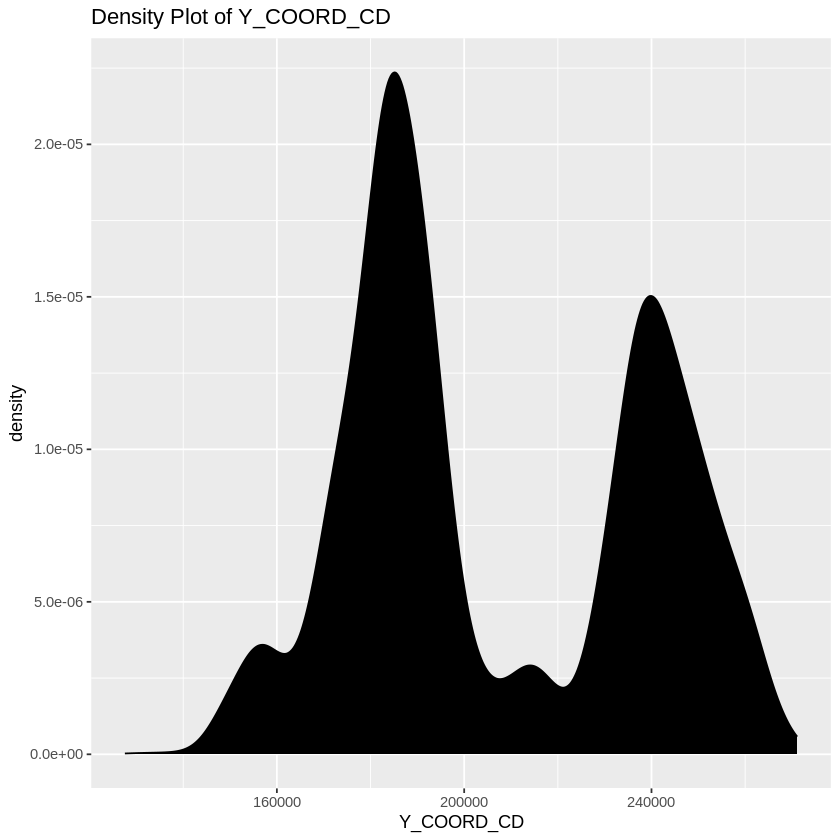

In [ ]:
# Density plot for Y_COORD_CD
ggplot(final_shooting_dataset, aes(x = Y_COORD_CD)) +
  geom_density(fill = "black") +
  labs(title = "Density Plot of Y_COORD_CD")

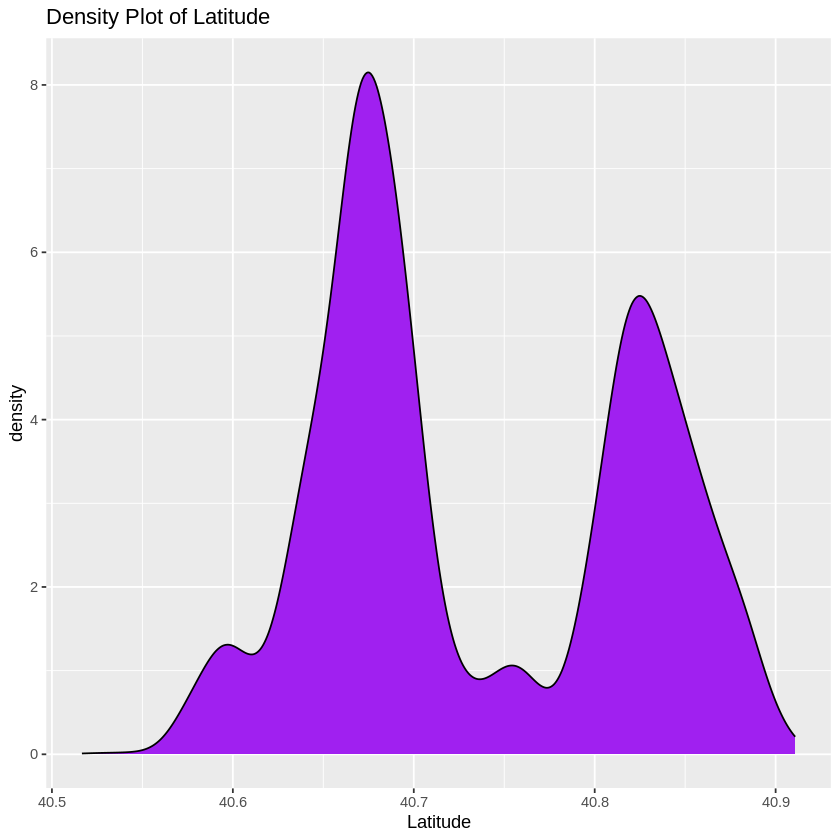

In [ ]:
# Density plot for Latitude
ggplot(final_shooting_dataset, aes(x = Latitude)) +
  geom_density(fill = "purple") +
  labs(title = "Density Plot of Latitude")

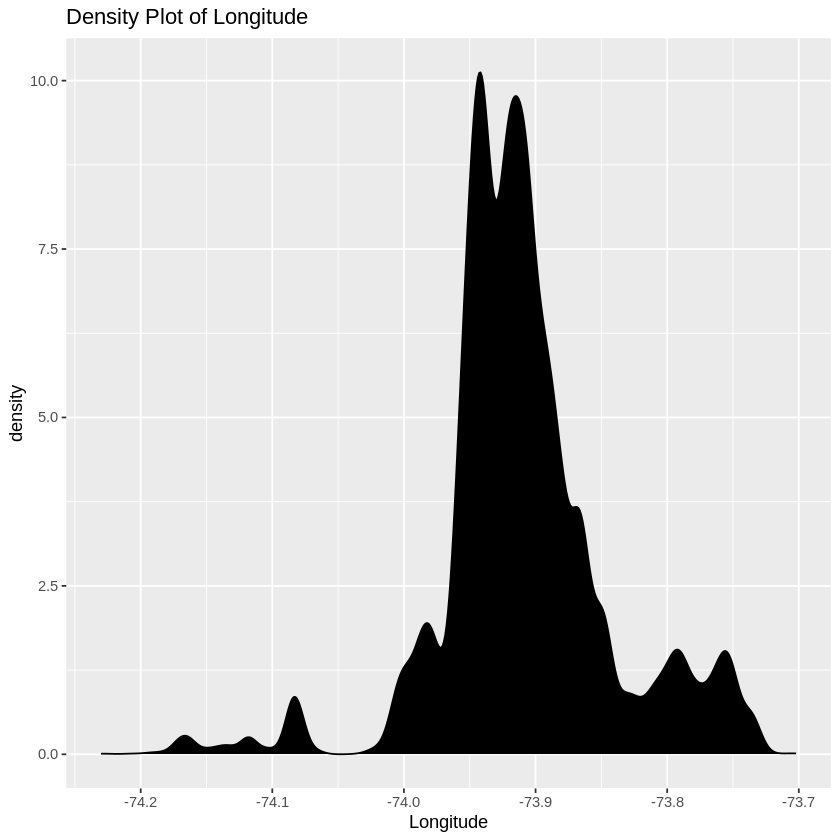

In [ ]:
# Density plot for Longitude
ggplot(final_shooting_dataset, aes(x = Longitude)) +
  geom_density(fill = "black") +
  labs(title = "Density Plot of Longitude")

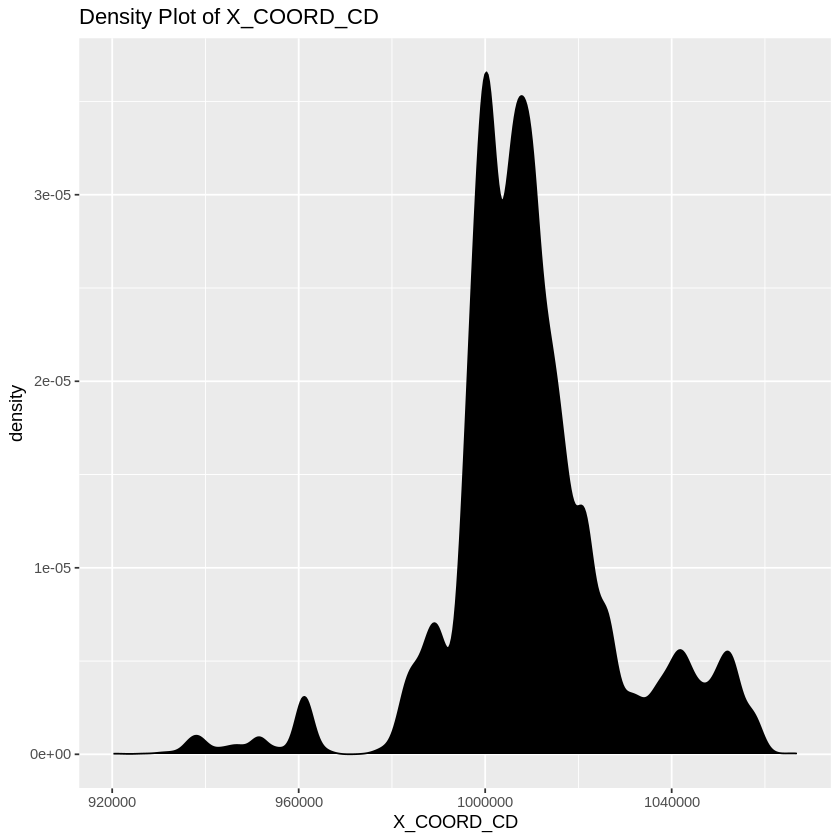

In [ ]:
# Density plot for Y_COORD_CD
ggplot(final_shooting_dataset, aes(x = X_COORD_CD)) +
  geom_density(fill = "black") +
  labs(title = "Density Plot of X_COORD_CD")

In [ ]:
correlation <- cor(final_shooting_dataset$X_COORD_CD, final_shooting_dataset$Longitude)
# Printing the correlation coefficient
print(correlation)

[1] 0.9999976


In [ ]:
correlation <- cor(final_shooting_dataset$Y_COORD_CD, final_shooting_dataset$Latitude)
# Printing the correlation coefficient
print(correlation)

[1] 0.9999997


In [ ]:
# Creating a spatial data frame using latitude and longitude
shooting_sf <- st_as_sf(final_shooting_dataset, coords = c("Longitude", "Latitude"))

In [ ]:
# Removing rows with missing coordinates
shooting_incident_level_data <- shooting_incident_level_data[complete.cases(shooting_incident_level_data$Longitude, shooting_incident_level_data$Latitude), ]

# Create a spatial data frame
shooting_sf <- st_as_sf(shooting_incident_level_data, coords = c("Longitude", "Latitude"))


In [ ]:
head(shooting_sf)

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

INCIDENT_KEY OCCUR_DATE BORO     LOC_OF_OCCUR_DESC PRECINCT JURISDICTION_CODE
1 228798151    2021-05-27 QUEENS   NA                105      0                
2 137471050    2014-06-27 BRONX    NA                40       0                
3 147998800    2015-11-21 QUEENS   NA                108      0                
4 146837977    2015-10-09 BRONX    NA                44       0                
5 58921844     2009-02-19 BRONX    NA                47       0                
6 219559682    2020-10-21 BROOKLYN NA                81       0                
  LOC_CLASSFCTN_DESC LOCATION_DESC STATISTICAL_MURDER_FLAG PERP_AGE_GROUP
1 NA                 NA            FALSE                   NA            
2 NA                 NA            FALSE                   NA            
3 NA                 NA             TRUE                   NA            
4 NA                 NA            FALSE                   NA            
5 NA                 NA             TRUE                   25-44         
6 NA                 NA             TRUE                   NA            
  geometry                   ⋯ VIC_RACE       X_COORD_CD Y_COORD_CD
1 POINT (-73.73084 40.66296) ⋯ BLACK          1058925    180924.0  
2 POINT (-73.92494 40.81035) ⋯ BLACK          1005028    234516.0  
3 POINT (-73.91549 40.74261) ⋯ WHITE          1007668    209836.5  
4 POINT (-73.91946 40.83778) ⋯ WHITE HISPANIC 1006537    244511.1  
5 POINT (-73.85291 40.88624) ⋯ BLACK          1024922    262189.4  
6 POINT (-73.92795 40.67846) ⋯ BLACK          1004234    186461.7  
  Lon_Lat                                       VICTIM_COUNT OCCUR_YEAR
1 POINT (-73.73083868899994 40.662964620000025) 2            2021      
2 POINT (-73.92494232599995 40.81035186300006)  1            2014      
3 POINT (-73.91549174199997 40.74260663300004)  1            2015      
4 POINT (-73.91945661499994 40.83778200300003)  1            2015      
5 POINT (-73.85290950899997 40.88623791800006)  1            2009      
6 POINT (-73.92795224099996 40.678456718000064) 1            2020      
  OCCUR_DATETIME      DayOfWeek HourOfDay geometry                  
1 2021-05-27 21:30:00 Thursday  21        POINT (-73.73084 40.66296)
2 2014-06-27 17:40:00 Friday    17        POINT (-73.92494 40.81035)
3 2015-11-21 03:56:00 Saturday   3        POINT (-73.91549 40.74261)
4 2015-10-09 18:30:00 Friday    18        POINT (-73.91946 40.83778)
5 2009-02-19 22:58:00 Thursday  22        POINT (-73.85291 40.88624)
6 2020-10-21 21:36:00 Wednesday 21        POINT (-73.92795 40.67846)

In [ ]:
install.packages("spatstat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘polyclip’, ‘spatstat.sparse’, ‘goftest’, ‘abind’, ‘tensor’, ‘spatstat.data’, ‘spatstat.geom’, ‘spatstat.random’, ‘spatstat.explore’, ‘spatstat.model’, ‘spatstat.linnet’, ‘spatstat.utils’




In [ ]:
st_crs()

Coordinate Reference System: NA

In [ ]:
shooting_sf <- st_set_crs(shooting_sf, st_crs(4326))

Loading required package: spatstat.data

Loading required package: spatstat.geom

spatstat.geom 3.2-5

Loading required package: spatstat.random

spatstat.random 3.1-6

Loading required package: spatstat.explore

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


spatstat.explore 3.2-3


Attaching package: ‘spatstat.explore’


The following object is masked from ‘package:lattice’:

    panel.histogram


Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.2-6


Attaching package: ‘spatstat.model’


The following object is masked from ‘package:lattice’:

    panel.histogram


Loading required package: spatstat.linnet

spatstat.linnet 3.1-1


spatstat 3.0-6 
For an introduction to spatstat, type ‘beginner’ 




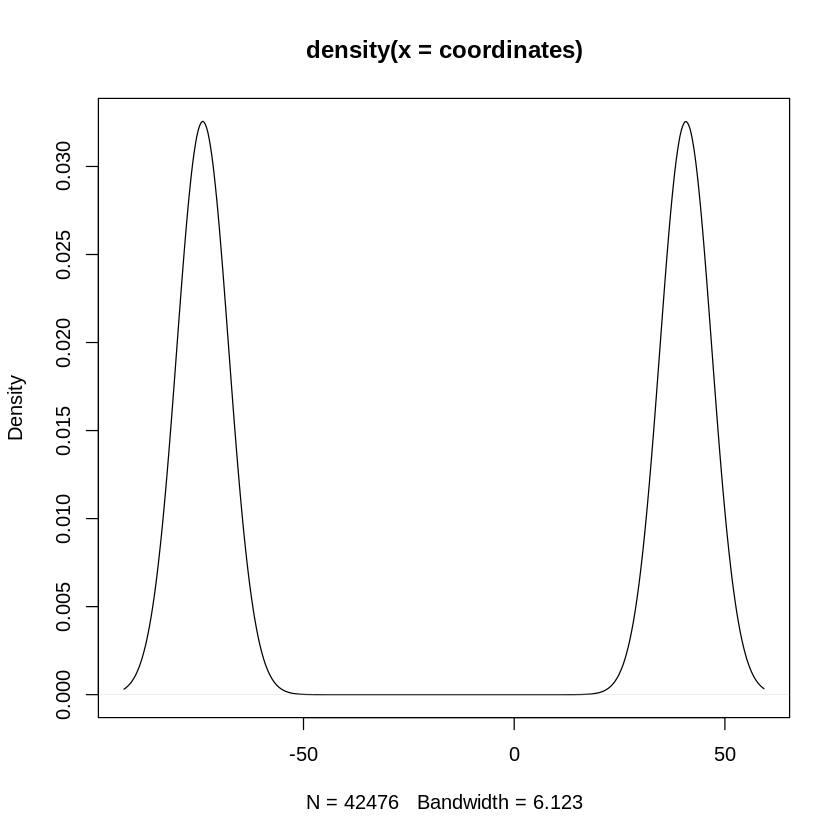

In [ ]:
library(spatstat)

# Extracting the numeric coordinates from shooting_sf
coordinates <- st_coordinates(shooting_sf)

# Computing kernel density estimation
shooting_density <- density(coordinates)

# Ploting the kernel density estimate
plot(shooting_density)



In [ ]:
borough_boundaries <- st_read("Borough_Boundaries.geojson")

Reading layer `Borough_Boundaries' from data source 
  `/content/Borough_Boundaries.geojson' using driver `GeoJSON'
Simple feature collection with 5 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25559 ymin: 40.49613 xmax: -73.70001 ymax: 40.91553
Geodetic CRS:  WGS 84


In [ ]:
head(borough_boundaries)

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,boro_code,boro_name,shape_area,shape_leng,geometry
,<chr>,<chr>,<chr>,<chr>,<MULTIPOLYGON [°]>
1,5,Staten Island,1623620725.05,325917.35395,MULTIPOLYGON (((-74.05051 4...
2,2,Bronx,1187174784.85,463179.772813,MULTIPOLYGON (((-73.89681 4...
3,4,Queens,3041418505.55,888199.730955,MULTIPOLYGON (((-73.82645 4...
4,1,Manhattan,636520502.801,357713.30866,MULTIPOLYGON (((-74.01093 4...
5,3,Brooklyn,1934138258.43,728148.53241,MULTIPOLYGON (((-73.86327 4...


In [ ]:
# Converting the 'boro_name' column to a factor
borough_boundaries$boro_name <- as.factor(borough_boundaries$boro_name)
# Converting 'shape_area' and 'shape_leng' columns to numeric
borough_boundaries$shape_area <- as.numeric(borough_boundaries$shape_area)
borough_boundaries$shape_leng <- as.numeric(borough_boundaries$shape_leng)


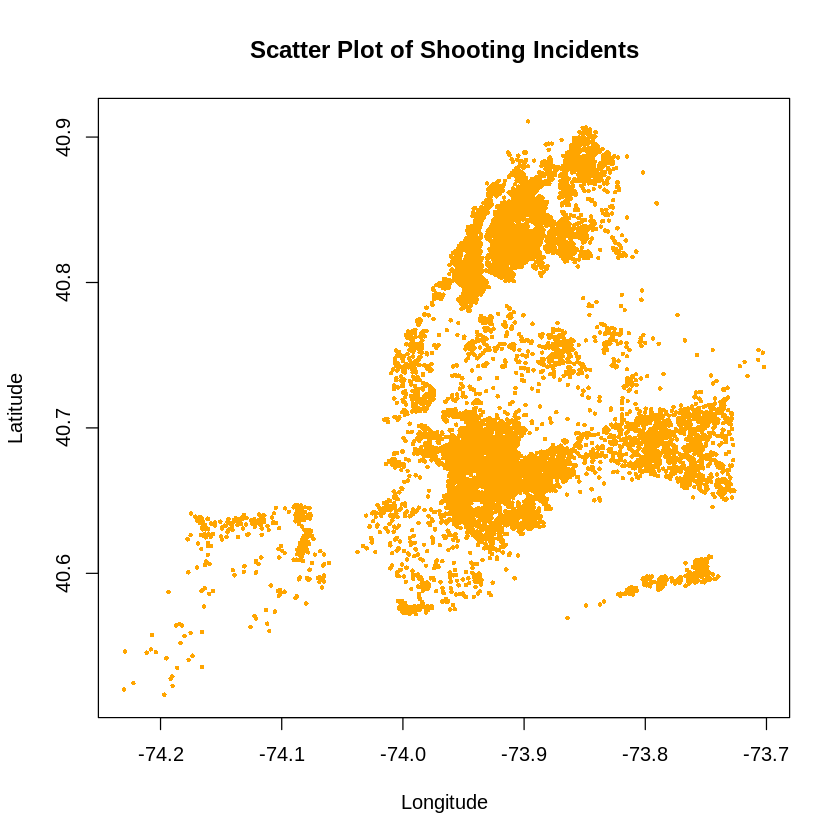

In [ ]:
plot(shooting_incident_level_data$Longitude, shooting_incident_level_data$Latitude,
     pch = 16, cex = 0.5, col = "orange",
     xlab = "Longitude", ylab = "Latitude",
     main = "Scatter Plot of Shooting Incidents")


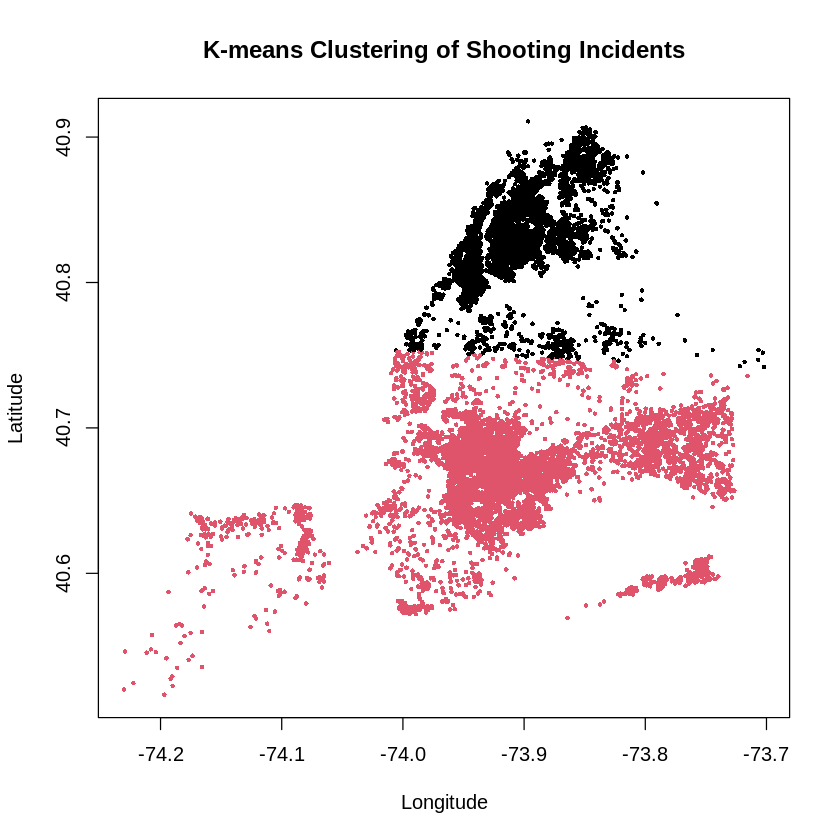

In [ ]:
# K-means clustering for cluster detections
kmeans_result <- kmeans(shooting_incident_level_data[, c("Longitude", "Latitude")], centers = 2)

# Ploting the clustered data
plot(shooting_incident_level_data$Longitude,shooting_incident_level_data$Latitude,
     pch = 16, cex = 0.5, col = kmeans_result$cluster,
     xlab = "Longitude", ylab = "Latitude",
     main = "K-means Clustering of Shooting Incidents")


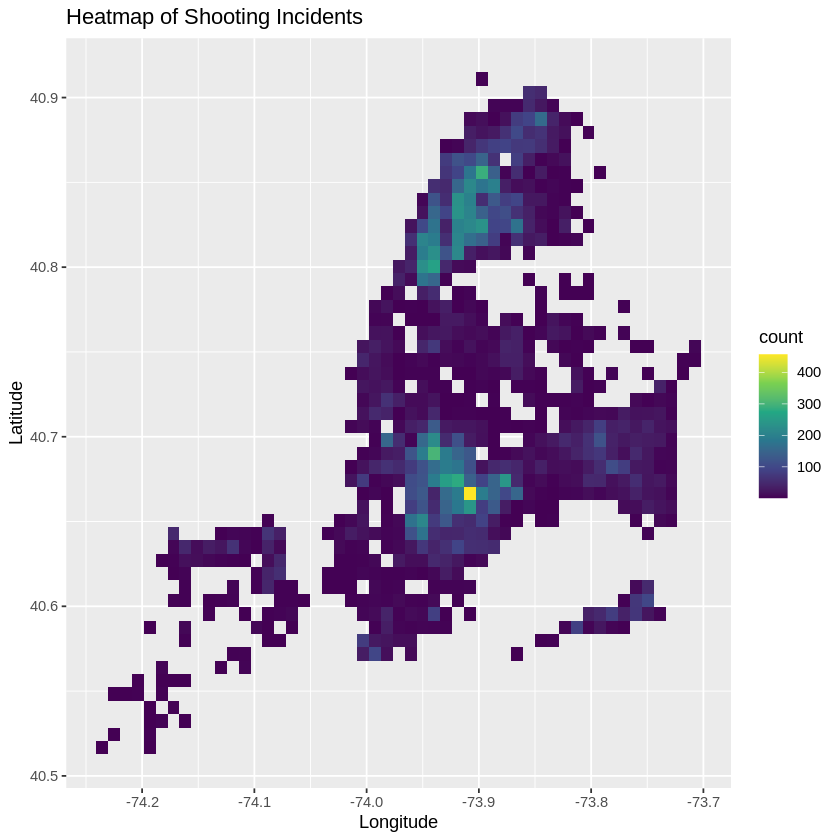

In [ ]:
library(ggplot2)
ggplot(data = shooting_incident_level_data, aes(x = Longitude, y = Latitude)) +
  geom_bin2d(bins = 50) +
  scale_fill_continuous(type = "viridis") +
  labs(title = "Heatmap of Shooting Incidents")


In [ ]:
# Calculating the center coordinates (mean latitude and longitude) for each cluster
cluster_centers <- kmeans_result$centers

# Getting the cluster assignments for each incident
cluster_assignments <- kmeans_result$cluster

# Creating a data frame that includes the cluster assignments
clustered_data <- cbind(shooting_incident_level_data, Cluster = cluster_assignments)

# Calculating the size (number of incidents) in each cluster
cluster_sizes <- table(cluster_assignments)

# Printing the center coordinates and cluster sizes
for (i in 1:nrow(cluster_centers)) {
  cluster_center <- cluster_centers[i, ]
  cluster_size <- cluster_sizes[i]

  cat("Cluster", i, "Center (Latitude, Longitude):", cluster_center, "\n")
  cat("Cluster", i, "Size (Number of Incidents):", cluster_size, "\n")
}


Cluster 1 Center (Latitude, Longitude): -73.91202 40.6677 
Cluster 1 Size (Number of Incidents): 15430 
Cluster 2 Center (Latitude, Longitude): -73.90486 40.83118 
Cluster 2 Size (Number of Incidents): 11638 


In [ ]:
library(cluster)
silhouette_score <- silhouette(kmeans_result$cluster, dist(shooting_incident_level_data[, c("Longitude", "Latitude")]))
summary(silhouette_score)



Attaching package: ‘cluster’


The following object is masked from ‘package:spatstat.geom’:

    volume




Silhouette of 27068 units in 2 clusters from silhouette.default(x = kmeans_result$cluster, dist = dist(shooting_incident_level_data[, c("Longitude", "Latitude")])) :
 Cluster sizes and average silhouette widths:
    15430     11638 
0.4501902 0.6825200 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1785  0.4588  0.5833  0.5501  0.7073  0.7868 

In [ ]:
wcss <- sum(kmeans_result$tot.withinss)
print(wcss)

[1] 147.9949
